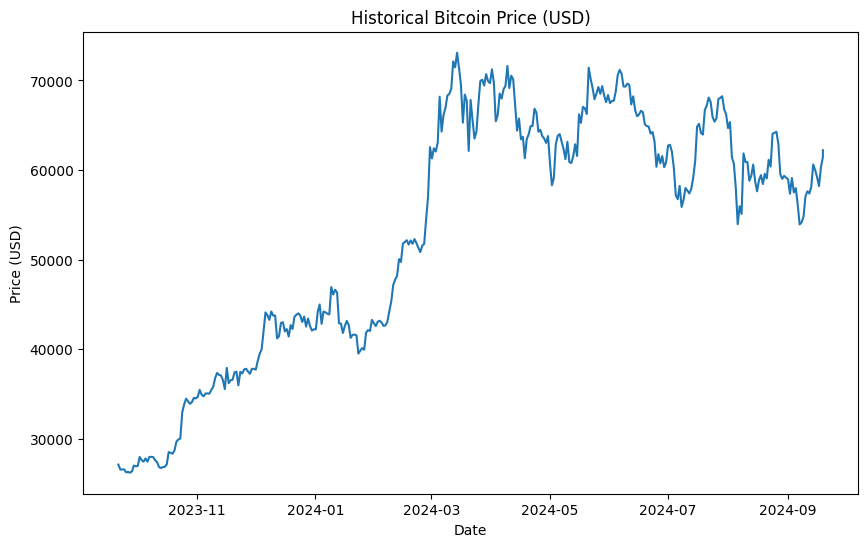

In [1]:
import pycoingecko
import matplotlib.pyplot as plt
import datetime
import numpy as np

coinGecko = pycoingecko.CoinGeckoAPI()
btc_data = coinGecko.get_coin_market_chart_by_id('bitcoin', 'usd', '365days')
dates = [data[0] for data in btc_data['prices']]

#convert unix timestamp to datetime
dates = [
    datetime.datetime.fromtimestamp(date/1000)
    for date in dates
]
prices_btc = [data[1] for data in btc_data['prices']]
plt.figure(figsize=(10,6))
plt.plot(dates, prices_btc)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Historical Bitcoin Price (USD)')
plt.show()

In [2]:
btc_data

{'prices': [[1695254400000, 27115.846446970816],
  [1695340800000, 26561.133454198716],
  [1695427200000, 26572.0381115526],
  [1695513600000, 26573.9234797301],
  [1695600000000, 26249.562897845204],
  [1695686400000, 26298.634678281232],
  [1695772800000, 26204.75759083597],
  [1695859200000, 26350.146895428057],
  [1695945600000, 27009.01375072488],
  [1696032000000, 26917.199101637976],
  [1696118400000, 26969.876144072576],
  [1696204800000, 27967.510579087113],
  [1696291200000, 27615.06488509527],
  [1696377600000, 27439.121946705116],
  [1696464000000, 27792.1112772493],
  [1696550400000, 27435.874615135104],
  [1696636800000, 27958.196437350485],
  [1696723200000, 27977.543490700005],
  [1696809600000, 27948.10365174851],
  [1696896000000, 27593.782534439666],
  [1696982400000, 27392.247702732497],
  [1697068800000, 26842.190439092396],
  [1697155200000, 26729.137205815106],
  [1697241600000, 26841.136220644406],
  [1697328000000, 26863.183569079916],
  [1697414400000, 27150.2

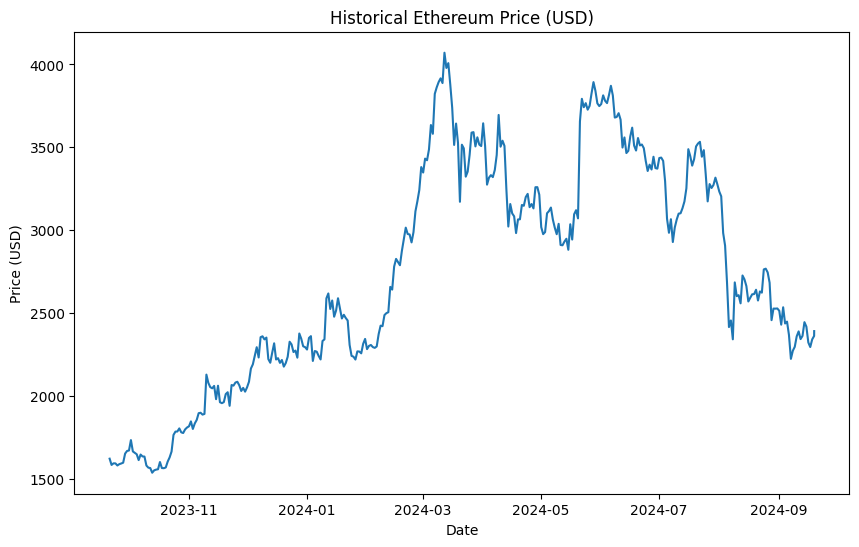

In [3]:
eth_data = coinGecko.get_coin_market_chart_by_id('ethereum', 'usd', '365days')
dates = [data[0] for data in eth_data['prices']]
dates = [
    datetime.datetime.fromtimestamp(date/1000)
    for date in dates
]
prices_eth = [data[1] for data in eth_data['prices']]
plt.figure(figsize=(10,6))
plt.plot(dates, prices_eth)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Historical Ethereum Price (USD)')
plt.show()

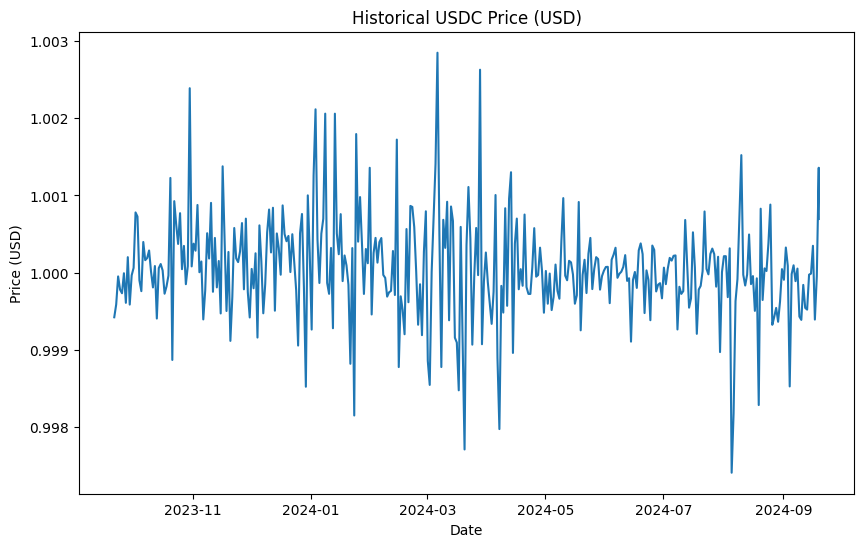

In [4]:
usdc_data = coinGecko.get_coin_market_chart_by_id('usd-coin', 'usd', '365days')
dates = [data[0] for data in usdc_data['prices']]
dates = [
    datetime.datetime.fromtimestamp(date/1000)
    for date in dates
]
prices_usdc = [data[1] for data in usdc_data['prices']]
plt.figure(figsize=(10,6))
plt.plot(dates, prices_usdc)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Historical USDC Price (USD)')
plt.show()

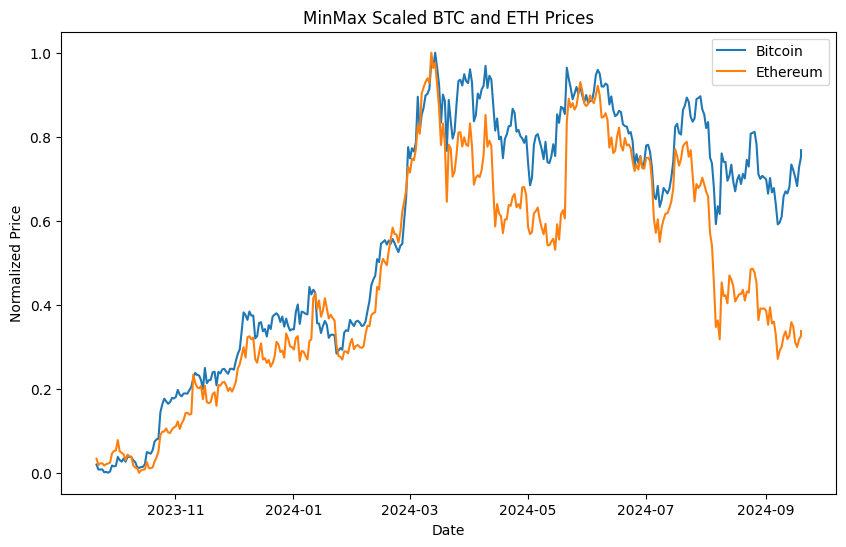

In [5]:
prices_btc = np.array(prices_btc)
prices_eth = np.array(prices_eth)
prices_usdc = np.array(prices_usdc)

scaled_prices_btc = (prices_btc - min(prices_btc))/(max(prices_btc) - min(prices_btc))
scaled_prices_eth = (prices_eth - min(prices_eth))/(max(prices_eth) - min(prices_eth))
scaled_prices_usdc = (prices_usdc - min(prices_usdc))/(max(prices_usdc) - min(prices_usdc))

plt.figure(figsize=(10,6))
plt.plot(dates, scaled_prices_btc, label='Bitcoin')
plt.plot(dates, scaled_prices_eth, label='Ethereum')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.title('MinMax Scaled BTC and ETH Prices')
plt.legend()
plt.show()

In [6]:
slopes_btc = np.gradient(scaled_prices_btc)
slopes_eth = np.gradient(scaled_prices_eth)
slopes_usdc = np.gradient(scaled_prices_usdc)

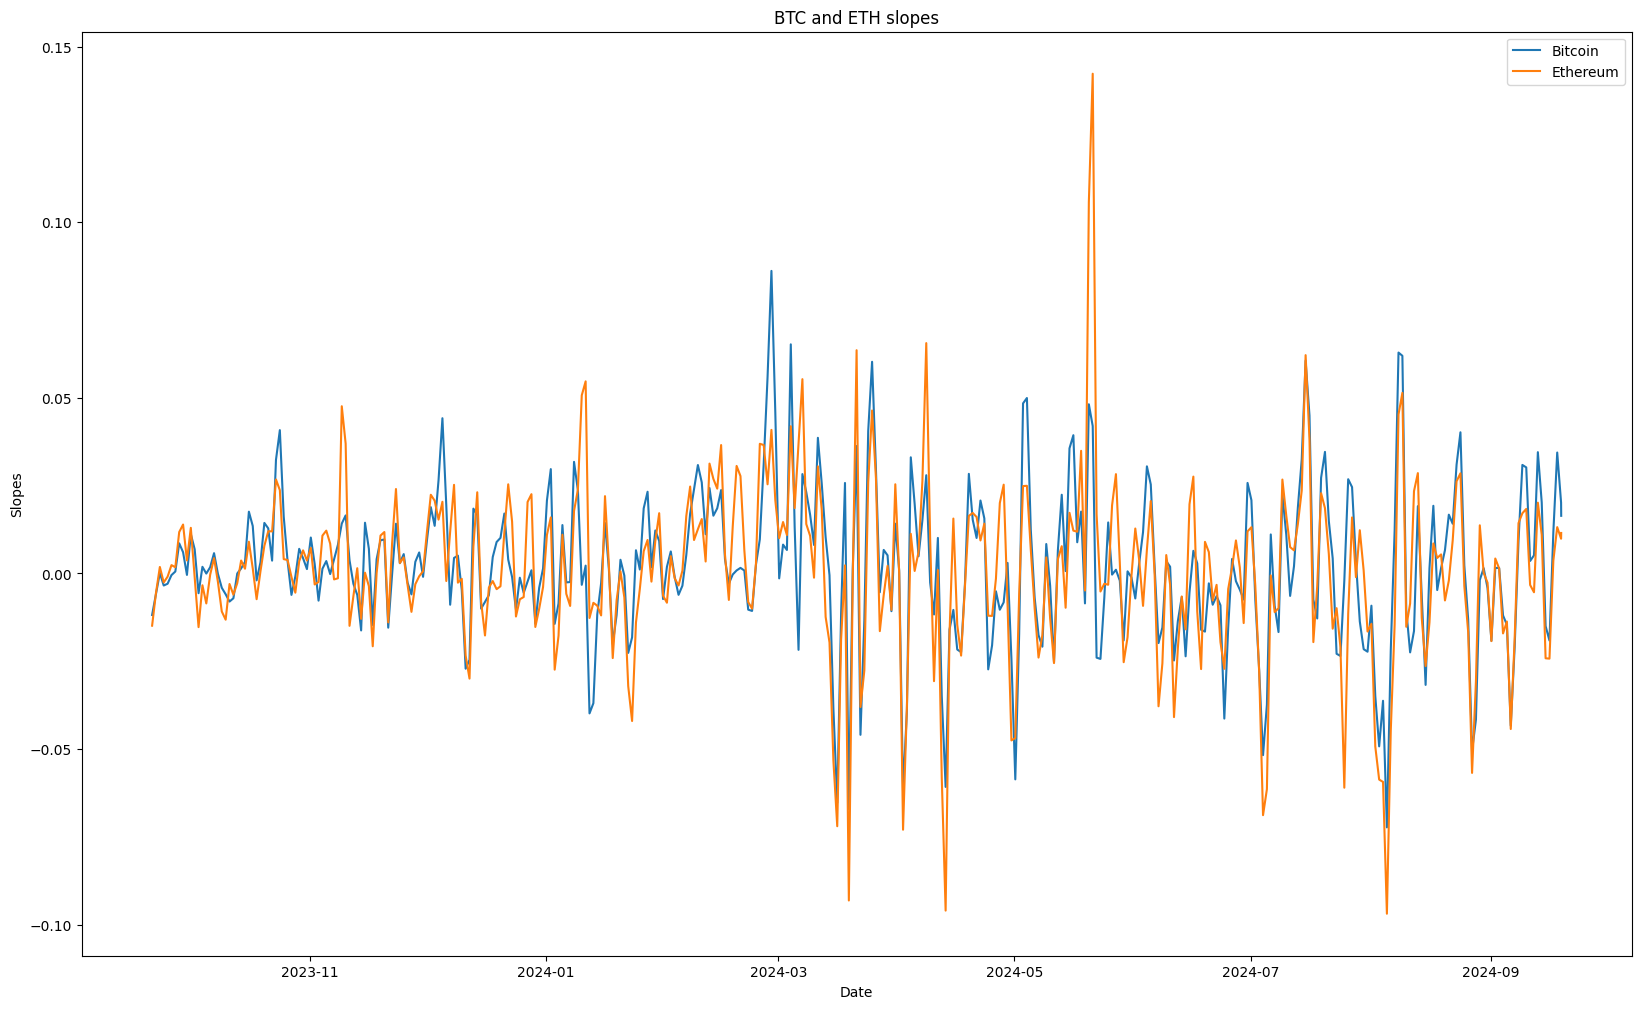

In [7]:
plt.figure(figsize=(20,12))
plt.plot(dates, slopes_btc, label='Bitcoin')
plt.plot(dates, slopes_eth, label='Ethereum')
plt.xlabel('Date')
plt.ylabel('Slopes')
plt.title('BTC and ETH slopes')
plt.legend()
plt.show()

In [8]:
corr_btc_eth_prices = np.corrcoef(scaled_prices_btc, scaled_prices_eth)
print(corr_btc_eth_prices)

[[1.         0.93080555]
 [0.93080555 1.        ]]


In [9]:
#This is the uniswap v3 query run to get liquidity pool data
# {
#   poolDayDatas(first: 365, orderBy: date, where: {
#     pool: "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8",
#     date_gt:	1695254400
#   } ) {
#     date
#     liquidity
#     sqrtPrice
#     token0Price
#     token1Price
#     volumeToken0
#     volumeToken1
#   }
# }

In [10]:
#last 365 days Uniswap ETH-USDC pool data, taken from the Uniswap subgraph
raw_data = {
  "data": {
    "poolDayDatas": [
      {
        "date": 1695340800,
        "liquidity": "4941210480885409110",
        "sqrtPrice": "1984481335773356987848526031064291",
        "token0Price": "1593.914898757702560921453524198983",
        "token1Price": "0.0006273860673360918482945277818539611",
        "volumeToken0": "1813808.797346",
        "volumeToken1": "1139.207565259537531002"
      },
      {
        "date": 1695427200,
        "liquidity": "4950604225729128129",
        "sqrtPrice": "1985567650559340767234079383289235",
        "token0Price": "1592.171296955005586543369918728583",
        "token1Price": "0.0006280731237351654014965810655697491",
        "volumeToken0": "165729.777167",
        "volumeToken1": "104.238673217418485794"
      },
      {
        "date": 1695513600,
        "liquidity": "4056968750739689251",
        "sqrtPrice": "1995086977435626489709801204452965",
        "token0Price": "1577.013821930746610556601952781358",
        "token1Price": "0.0006341098512222895764046083391014568",
        "volumeToken0": "2095843.945802",
        "volumeToken1": "1321.540345463091327942"
      },
      {
        "date": 1695600000,
        "liquidity": "4285288913052418753",
        "sqrtPrice": "1989546256720753551466239666365611",
        "token0Price": "1585.809757320084707045782438270555",
        "token1Price": "0.0006305926643369472797174174600366848",
        "volumeToken0": "3322541.262295",
        "volumeToken1": "2105.124611500836562367"
      },
      {
        "date": 1695686400,
        "liquidity": "4075759683449755541",
        "sqrtPrice": "1987030662878108433059213887984176",
        "token0Price": "1589.827590105540158474252696455502",
        "token1Price": "0.0006289990224245733108035699061194927",
        "volumeToken0": "1248316.937566",
        "volumeToken1": "785.268541413331885532"
      },
      {
        "date": 1695772800,
        "liquidity": "4066382904311156876",
        "sqrtPrice": "1983136288370066669149561597002394",
        "token0Price": "1596.077753774065455601719628678513",
        "token1Price": "0.0006265358925249177437171317450649102",
        "volumeToken0": "4649417.377158",
        "volumeToken1": "2892.890508780060512563"
      },
      {
        "date": 1695859200,
        "liquidity": "4141540046397846235",
        "sqrtPrice": "1950003850951653443542281290566156",
        "token0Price": "1650.776316325848644389222864969939",
        "token1Price": "0.0006057755918292498961430215542443089",
        "volumeToken0": "7007590.417716",
        "volumeToken1": "4270.883512639635299667"
      },
      {
        "date": 1695945600,
        "liquidity": "4209156297740851343",
        "sqrtPrice": "1942062894072113237108375104760209",
        "token0Price": "1664.303729825428489138548513763112",
        "token1Price": "0.000600851865004767860418003878840795",
        "volumeToken0": "5244281.555219",
        "volumeToken1": "3138.172682602664563271"
      },
      {
        "date": 1696032000,
        "liquidity": "4195772192822107691",
        "sqrtPrice": "1936744718252988392997150005776093",
        "token0Price": "1673.456419890615602467847030980709",
        "token1Price": "0.000597565606199272493645244251462985",
        "volumeToken0": "1996599.749738",
        "volumeToken1": "1189.085489445257328892"
      },
      {
        "date": 1696118400,
        "liquidity": "4288138045583727889",
        "sqrtPrice": "1903026250537338107073707867359872",
        "token0Price": "1733.283526556544295478183104753539",
        "token1Price": "0.0005769396550988205296769208302328501",
        "volumeToken0": "5110972.135517",
        "volumeToken1": "3001.77256835600849554"
      },
      {
        "date": 1696204800,
        "liquidity": "4443057881802392131",
        "sqrtPrice": "1944220434700257512567140705504638",
        "token0Price": "1660.611956549713299886442050714478",
        "token1Price": "0.0006021876429685114489401767074450116",
        "volumeToken0": "13649579.271061",
        "volumeToken1": "8099.774800092040387401"
      },
      {
        "date": 1696291200,
        "liquidity": "4378328699997744478",
        "sqrtPrice": "1947720798560426728498191450470994",
        "token0Price": "1654.648552689722747290052459148143",
        "token1Price": "0.0006043579456038834870424601194229973",
        "volumeToken0": "2280372.421677",
        "volumeToken1": "1377.376108715923187381"
      },
      {
        "date": 1696377600,
        "liquidity": "4410386442881878592",
        "sqrtPrice": "1951515184619547871354977063290093",
        "token0Price": "1648.220448169452509717233960900945",
        "token1Price": "0.0006067149580085725448313702550907015",
        "volumeToken0": "4360148.818533",
        "volumeToken1": "2652.803558393495381018"
      },
      {
        "date": 1696464000,
        "liquidity": "4432734415962848107",
        "sqrtPrice": "1971443365648599507744102261864599",
        "token0Price": "1615.06704873997123626569158794286",
        "token1Price": "0.0006191693408519300663683554581613646",
        "volumeToken0": "3240849.833051",
        "volumeToken1": "1987.178749009297485873"
      },
      {
        "date": 1696550400,
        "liquidity": "4517185610700061376",
        "sqrtPrice": "1951468687180558662562629210459967",
        "token0Price": "1648.298993055420816380838173206713",
        "token1Price": "0.0006066860467749960968403420860140642",
        "volumeToken0": "5917162.750281",
        "volumeToken1": "3616.629292621182505407"
      },
      {
        "date": 1696636800,
        "liquidity": "4497201862950335252",
        "sqrtPrice": "1959109557998085544078441455933933",
        "token0Price": "1635.466755714063766831963963748888",
        "token1Price": "0.0006114462409621945473072552059762605",
        "volumeToken0": "724586.896586",
        "volumeToken1": "442.626833533110901606"
      },
      {
        "date": 1696723200,
        "liquidity": "4543574621168959463",
        "sqrtPrice": "1960461992305186071801210723594473",
        "token0Price": "1633.211064529499597333861061061259",
        "token1Price": "0.0006122907330952249190584860065000306",
        "volumeToken0": "5017500.703705",
        "volumeToken1": "3084.059312828326142228"
      },
      {
        "date": 1696809600,
        "liquidity": "4985422093540333159",
        "sqrtPrice": "1993628878863264969567740833625207",
        "token0Price": "1579.321455521480437631733428752302",
        "token1Price": "0.000633183318382645087303461623591037",
        "volumeToken0": "8179668.073833",
        "volumeToken1": "5158.784301650529847702"
      },
      {
        "date": 1696896000,
        "liquidity": "4992611468016323118",
        "sqrtPrice": "2001190584574169540887676643090433",
        "token0Price": "1567.408745725397385483781080300899",
        "token1Price": "0.0006379956745342770214943991007839379",
        "volumeToken0": "4725953.843742",
        "volumeToken1": "3003.947730955755818118"
      },
      {
        "date": 1696982400,
        "liquidity": "6155305236917753276",
        "sqrtPrice": "2003295178287466295645023899755187",
        "token0Price": "1564.117143123426299145099304690587",
        "token1Price": "0.0006393383030142319969171549813156872",
        "volumeToken0": "6147047.507131",
        "volumeToken1": "3934.10843370480244245"
      },
      {
        "date": 1697068800,
        "liquidity": "5558272984998902617",
        "sqrtPrice": "2022272909347416127918595940847434",
        "token0Price": "1534.898421391523194782307077175875",
        "token1Price": "0.0006515089116408174020039879613485205",
        "volumeToken0": "5073632.66406",
        "volumeToken1": "3291.32886725694692449"
      },
      {
        "date": 1697155200,
        "liquidity": "5555348446439411349",
        "sqrtPrice": "2012409091003003618179195044964336",
        "token0Price": "1549.98189871280452091045496484649",
        "token1Price": "0.0006451688247652817071524419186453602",
        "volumeToken0": "5232615.905695",
        "volumeToken1": "3366.650531214534993835"
      },
      {
        "date": 1697241600,
        "liquidity": "5557947752626338468",
        "sqrtPrice": "2008298772031863726227041967799793",
        "token0Price": "1556.332985182723231323782335749127",
        "token1Price": "0.0006425360186545128981054972099072274",
        "volumeToken0": "877026.083762",
        "volumeToken1": "564.368267548793445734"
      },
      {
        "date": 1697328000,
        "liquidity": "5565166265139784433",
        "sqrtPrice": "2007872451718961761079670416786704",
        "token0Price": "1556.993950278278351803910499444644",
        "token1Price": "0.0006422632533808317241213203172707932",
        "volumeToken0": "1478023.387505",
        "volumeToken1": "948.661437688302090113"
      },
      {
        "date": 1697414400,
        "liquidity": "5343519799038961785",
        "sqrtPrice": "1980369170911146828266156141897800",
        "token0Price": "1600.541184367390216415460462616289",
        "token1Price": "0.0006247886713363439167984649680381556",
        "volumeToken0": "21010499.813065",
        "volumeToken1": "13175.416479688674293428"
      },
      {
        "date": 1697500800,
        "liquidity": "6529563797177415217",
        "sqrtPrice": "2003877511211194801597058401502725",
        "token0Price": "1563.208200777479254914670361445823",
        "token1Price": "0.0006397100523798677009973947874499576",
        "volumeToken0": "7494144.581943",
        "volumeToken1": "4753.843024317247464267"
      },
      {
        "date": 1697587200,
        "liquidity": "6529729461447844347",
        "sqrtPrice": "2005012014825023028921550523335285",
        "token0Price": "1561.439669121311350889982937702073",
        "token1Price": "0.0006404346064569645647538694876637627",
        "volumeToken0": "4889599.093943",
        "volumeToken1": "3108.948507408873514076"
      },
      {
        "date": 1697673600,
        "liquidity": "6534391915920036114",
        "sqrtPrice": "2000407935628807336345575489159775",
        "token0Price": "1568.635466291622784349214343507876",
        "token1Price": "0.0006374967425440649987992465267499391",
        "volumeToken0": "3840087.549346",
        "volumeToken1": "2461.908834428230343421"
      },
      {
        "date": 1697760000,
        "liquidity": "5488792618877509744",
        "sqrtPrice": "1976717545240222769345171324786668",
        "token0Price": "1606.460063052262348364895364831507",
        "token1Price": "0.0006224866854766419325490014918907926",
        "volumeToken0": "8552263.501186",
        "volumeToken1": "5344.321346507627814017"
      },
      {
        "date": 1697846400,
        "liquidity": "4898862199345719300",
        "sqrtPrice": "1961427429212370634557357381151876",
        "token0Price": "1631.603690057948542781540516046835",
        "token1Price": "0.0006128939313470685334125395629178208",
        "volumeToken0": "4011633.882614",
        "volumeToken1": "2477.232143095432580379"
      },
      {
        "date": 1697932800,
        "liquidity": "4644331989647462804",
        "sqrtPrice": "1942413318801907045325472192837972",
        "token0Price": "1663.703280300769562309939807852422",
        "token1Price": "0.0006010687193086599098219835767512913",
        "volumeToken0": "5302590.911807",
        "volumeToken1": "3230.376004387072624751"
      },
      {
        "date": 1698019200,
        "liquidity": "6402740069825153686",
        "sqrtPrice": "1887005554540732556557904492793324",
        "token0Price": "1762.839650989018605283457795837291",
        "token1Price": "0.0005672665687085962749884207161918749",
        "volumeToken0": "24374670.484893",
        "volumeToken1": "14131.428732426316528932"
      },
      {
        "date": 1698105600,
        "liquidity": "5732970077127772705",
        "sqrtPrice": "1874647276248997322345626651319846",
        "token0Price": "1786.158674593255261094822297817807",
        "token1Price": "0.0005598606743198335297951607888381741",
        "volumeToken0": "34008628.500041",
        "volumeToken1": "18843.633580397904254036"
      },
      {
        "date": 1698192000,
        "liquidity": "5785952365189845429",
        "sqrtPrice": "1874927425544190244493215625828795",
        "token0Price": "1785.624943310572461402531620605763",
        "token1Price": "0.0005600280191796529578546501036461669",
        "volumeToken0": "11964268.511482",
        "volumeToken1": "6683.16363963027851805"
      },
      {
        "date": 1698278400,
        "liquidity": "5948567678214562613",
        "sqrtPrice": "1864543198819078557311543302271332",
        "token0Price": "1805.569740846967332520470497263828",
        "token1Price": "0.0005538418026051511506884171430771229",
        "volumeToken0": "23383109.726407",
        "volumeToken1": "12912.953463590999501606"
      },
      {
        "date": 1698364800,
        "liquidity": "5974593666547698062",
        "sqrtPrice": "1878517142040489566593486483848106",
        "token0Price": "1778.807051957920253820603479810845",
        "token1Price": "0.0005621745196587269663555186928690995",
        "volumeToken0": "10580613.68343",
        "volumeToken1": "5951.506997881372501312"
      },
      {
        "date": 1698451200,
        "liquidity": "6011419665510450586",
        "sqrtPrice": "1879574109644434487664503141724188",
        "token0Price": "1776.807010805376485619543689002702",
        "token1Price": "0.0005628073245539076384383670048037395",
        "volumeToken0": "4016640.928818",
        "volumeToken1": "2250.509107267590489586"
      },
      {
        "date": 1698537600,
        "liquidity": "6055110132943802788",
        "sqrtPrice": "1867770387475522032054411652768845",
        "token0Price": "1799.335698088617463687870551109558",
        "token1Price": "0.0005557606627058370625699210747738992",
        "volumeToken0": "5183937.466088",
        "volumeToken1": "2891.757342908603767182"
      },
      {
        "date": 1698624000,
        "liquidity": "6823231288074274814",
        "sqrtPrice": "1862040341578654981182837865346089",
        "token0Price": "1810.426907854255067361988786971044",
        "token1Price": "0.0005523559087978950182063669783720881",
        "volumeToken0": "10896539.573986",
        "volumeToken1": "6037.67801157806503554"
      },
      {
        "date": 1698710400,
        "liquidity": "7320726899792278292",
        "sqrtPrice": "1861182096482832236457386070774430",
        "token0Price": "1812.096973633192065876993057097614",
        "token1Price": "0.0005518468462507469545752539454724392",
        "volumeToken0": "8270851.21083",
        "volumeToken1": "4589.982676122754807515"
      },
      {
        "date": 1698796800,
        "liquidity": "6727390195210234616",
        "sqrtPrice": "1844104766579894715267777969760255",
        "token0Price": "1845.814216890612407697556089035869",
        "token1Price": "0.0005417663331711473727239773793617824",
        "volumeToken0": "19168873.988454",
        "volumeToken1": "10520.932143546411573882"
      },
      {
        "date": 1698883200,
        "liquidity": "6035414784687476368",
        "sqrtPrice": "1868277033800181187342157080987471",
        "token0Price": "1798.35992929994639446033627847336",
        "token1Price": "0.0005560622118561512635094460963082724",
        "volumeToken0": "13050403.895468",
        "volumeToken1": "7129.627136664855009969"
      },
      {
        "date": 1698969600,
        "liquidity": "6921324184380908404",
        "sqrtPrice": "1851164400415521330409425423190737",
        "token0Price": "1831.762601266637490648358607821581",
        "token1Price": "0.0005459222714278118703971924377133606",
        "volumeToken0": "8742218.825477",
        "volumeToken1": "4842.761847592237668228"
      },
      {
        "date": 1699056000,
        "liquidity": "7557141098216218168",
        "sqrtPrice": "1837026261395972308354033270779840",
        "token0Price": "1860.066357148265795310065261625372",
        "token1Price": "0.0005376152287024510978484562005265417",
        "volumeToken0": "4665128.377462",
        "volumeToken1": "2525.483868825144727717"
      },
      {
        "date": 1699142400,
        "liquidity": "7143156256054190666",
        "sqrtPrice": "1818232428926783942664938854912081",
        "token0Price": "1898.717568421593590657698806570218",
        "token1Price": "0.0005266712736172243425829254430020682",
        "volumeToken0": "18474872.410475",
        "volumeToken1": "9804.629269522600047754"
      },
      {
        "date": 1699228800,
        "liquidity": "8388107886250903504",
        "sqrtPrice": "1817414057445974324337157648922784",
        "token0Price": "1900.427917417942621082527477176696",
        "token1Price": "0.0005261972794835973406752107120075265",
        "volumeToken0": "10907197.863216",
        "volumeToken1": "5756.282261001805309519"
      },
      {
        "date": 1699315200,
        "liquidity": "7729817001792079639",
        "sqrtPrice": "1825690290033337926775132075080413",
        "token0Price": "1883.236903658139365683050390056572",
        "token1Price": "0.0005310006394084173147718155451485773",
        "volumeToken0": "11463605.60208",
        "volumeToken1": "6092.849525236459168002"
      },
      {
        "date": 1699401600,
        "liquidity": "7055484367344648219",
        "sqrtPrice": "1821650270001329910679124982041787",
        "token0Price": "1891.59937775811288635595965943998",
        "token1Price": "0.0005286531660764134531561508859283883",
        "volumeToken0": "4024850.081915",
        "volumeToken1": "2128.929317963153844143"
      },
      {
        "date": 1699488000,
        "liquidity": "5296541766529551370",
        "sqrtPrice": "1718579033507780151680103682874509",
        "token0Price": "2125.299544810578430843261955531073",
        "token1Price": "0.0004705219094605918237340280101028817",
        "volumeToken0": "34907041.234378",
        "volumeToken1": "17424.871114602720694635"
      },
      {
        "date": 1699574400,
        "liquidity": "6510561480419810138",
        "sqrtPrice": "1735939060033116541577065140761399",
        "token0Price": "2083.004542322147176136718097347895",
        "token1Price": "0.0004800757654062498668534843105558611",
        "volumeToken0": "19683822.212339",
        "volumeToken1": "9386.470817902675872433"
      },
      {
        "date": 1699660800,
        "liquidity": "6194039488607340322",
        "sqrtPrice": "1750638651790955440265346131850522",
        "token0Price": "2048.170665294462946210685824733505",
        "token1Price": "0.0004882405636134971424262654695649199",
        "volumeToken0": "13105548.121976",
        "volumeToken1": "6358.9998612278814248"
      },
      {
        "date": 1699747200,
        "liquidity": "6212291437129183011",
        "sqrtPrice": "1753867405326626896666665641630054",
        "token0Price": "2040.636513995688821731152744585734",
        "token1Price": "0.000490043176793862203474513821417472",
        "volumeToken0": "9170206.154105",
        "volumeToken1": "4486.465925423315455878"
      },
      {
        "date": 1699833600,
        "liquidity": "7005050993427716379",
        "sqrtPrice": "1745454050818521389996332161132545",
        "token0Price": "2060.3562838019092345006846479736",
        "token1Price": "0.0004853529498086283106970357194092846",
        "volumeToken0": "29395815.234939",
        "volumeToken1": "14191.127753488885022288"
      },
      {
        "date": 1699920000,
        "liquidity": "5805073942093152215",
        "sqrtPrice": "1779447201013896985749666691669592",
        "token0Price": "1982.389345169258256827219634850026",
        "token1Price": "0.000504441774990784701021600388254017",
        "volumeToken0": "22101550.743015",
        "volumeToken1": "11000.042780463411680629"
      },
      {
        "date": 1700006400,
        "liquidity": "7226887144362518672",
        "sqrtPrice": "1747476003820660195741560490411455",
        "token0Price": "2055.591087119245670382711842263512",
        "token1Price": "0.0004864780774085880221239352631625827",
        "volumeToken0": "18748989.179791",
        "volumeToken1": "9278.24965436330131621"
      },
      {
        "date": 1700092800,
        "liquidity": "5586182335537336008",
        "sqrtPrice": "1789953696153124977744413921456598",
        "token0Price": "1959.185575048668802078154193143582",
        "token1Price": "0.0005104161712578751792736944880410925",
        "volumeToken0": "28475492.623125",
        "volumeToken1": "14097.786023467342303487"
      },
      {
        "date": 1700179200,
        "liquidity": "5604177611246887934",
        "sqrtPrice": "1789801837239108902059001877551815",
        "token0Price": "1959.518050308655500801544910023907",
        "token1Price": "0.0005103295679478349136060394918026829",
        "volumeToken0": "13292545.246304",
        "volumeToken1": "6820.979248750016289166"
      },
      {
        "date": 1700265600,
        "liquidity": "5604283451202869412",
        "sqrtPrice": "1790271780643969783987532147729845",
        "token0Price": "1958.4894447841261486167241848462",
        "token1Price": "0.000510597594826570366991305961119244",
        "volumeToken0": "5781792.147056",
        "volumeToken1": "2971.301322315892302046"
      },
      {
        "date": 1700352000,
        "liquidity": "6189272245456059894",
        "sqrtPrice": "1767380555387379503361173601316483",
        "token0Price": "2009.550952512566869601904903843551",
        "token1Price": "0.0004976236102646152879664171804840687",
        "volumeToken0": "5848579.852653",
        "volumeToken1": "2959.704898311769780691"
      },
      {
        "date": 1700438400,
        "liquidity": "5719014925792329053",
        "sqrtPrice": "1760423075543047001291529338844150",
        "token0Price": "2025.466488786319291441666893546843",
        "token1Price": "0.000493713426282954926119690626952425",
        "volumeToken0": "16681193.810197",
        "volumeToken1": "8214.464154910986450677"
      },
      {
        "date": 1700524800,
        "liquidity": "5535122862684178488",
        "sqrtPrice": "1798873215100292319999809378041496",
        "token0Price": "1939.804921896398261908581114622398",
        "token1Price": "0.000515515755585554869672701329480738",
        "volumeToken0": "22181046.947032",
        "volumeToken1": "11188.24977291441695863"
      },
      {
        "date": 1700611200,
        "liquidity": "5686571254793096948",
        "sqrtPrice": "1744333208135172682498047501708356",
        "token0Price": "2063.004948862985431958976616933089",
        "token1Price": "0.0004847298115068239934407516417716143",
        "volumeToken0": "17413773.825067",
        "volumeToken1": "8595.197617637160918209"
      },
      {
        "date": 1700697600,
        "liquidity": "5893741356097191906",
        "sqrtPrice": "1742711186100368343570867948617623",
        "token0Price": "2066.847004576774422938275922359262",
        "token1Price": "0.0004838287487102939684555732531781882",
        "volumeToken0": "7699834.442279",
        "volumeToken1": "3731.476769166056664201"
      },
      {
        "date": 1700784000,
        "liquidity": "5726361116381078545",
        "sqrtPrice": "1738994716946255413589004984489340",
        "token0Price": "2075.690713111890963056737786902996",
        "token1Price": "0.0004817673431225177852442102462562255",
        "volumeToken0": "11320520.185812",
        "volumeToken1": "5392.501983542105663982"
      },
      {
        "date": 1700870400,
        "liquidity": "5541059570114329886",
        "sqrtPrice": "1736852056059878525198107612746451",
        "token0Price": "2080.815207865658289301760491274347",
        "token1Price": "0.0004805808782153816598346952666028777",
        "volumeToken0": "1848667.478018",
        "volumeToken1": "888.641339844186092982"
      },
      {
        "date": 1700956800,
        "liquidity": "5774959213251275566",
        "sqrtPrice": "1742273095610549435375831069144624",
        "token0Price": "2067.88654293336387816364385121034",
        "token1Price": "0.000483585525239439726833288641943231",
        "volumeToken0": "6976204.599959",
        "volumeToken1": "3374.453263398731488895"
      },
      {
        "date": 1701043200,
        "liquidity": "5617678466128621992",
        "sqrtPrice": "1761264635729899402232643115508612",
        "token0Price": "2023.531351168484208874896766821167",
        "token1Price": "0.0004941855728711848036583302644463575",
        "volumeToken0": "10699477.197542",
        "volumeToken1": "5291.067259540904394533"
      },
      {
        "date": 1701129600,
        "liquidity": "5557004179626310238",
        "sqrtPrice": "1749426034013015685332871851274710",
        "token0Price": "2051.011035661959308737385548272735",
        "token1Price": "0.0004875644170667527371511904192710734",
        "volumeToken0": "9208886.885467",
        "volumeToken1": "4523.390847585645837344"
      },
      {
        "date": 1701216000,
        "liquidity": "5574702942013337323",
        "sqrtPrice": "1759916796491386834496931384189960",
        "token0Price": "2026.631997010391097125667786848253",
        "token1Price": "0.0004934294936007924512243478083880238",
        "volumeToken0": "6102649.361077",
        "volumeToken1": "2983.20877639575597869"
      },
      {
        "date": 1701302400,
        "liquidity": "5558821463746230711",
        "sqrtPrice": "1750749093807637948234251739512599",
        "token0Price": "2047.912265087602810386280311971164",
        "token1Price": "0.0004883021685292867552209905823046429",
        "volumeToken0": "4343838.764273",
        "volumeToken1": "2130.946764704268936564"
      },
      {
        "date": 1701388800,
        "liquidity": "5366228780100032075",
        "sqrtPrice": "1733079512211093856568298412414209",
        "token0Price": "2089.884047936363417960887007136759",
        "token1Price": "0.0004784954461887207125649731271943332",
        "volumeToken0": "7854427.296152",
        "volumeToken1": "3763.76815426066016725"
      },
      {
        "date": 1701475200,
        "liquidity": "5076099196018631550",
        "sqrtPrice": "1704078466930420770834636128747728",
        "token0Price": "2161.623186732304194989313957843455",
        "token1Price": "0.0004626153189593076752183668897519659",
        "volumeToken0": "9570647.226366",
        "volumeToken1": "4458.966059462929179372"
      },
      {
        "date": 1701561600,
        "liquidity": "4833301195214759481",
        "sqrtPrice": "1693480489827926125452699333855862",
        "token0Price": "2188.763169868321033317281718657983",
        "token1Price": "0.0004568790327645002172315560198968486",
        "volumeToken0": "5970487.026168",
        "volumeToken1": "2736.691022511664472642"
      },
      {
        "date": 1701648000,
        "liquidity": "5127874501343813262",
        "sqrtPrice": "1675127394262052574803101073295195",
        "token0Price": "2236.987130619422372268441285071013",
        "token1Price": "0.0004470298404099891785155070542246909",
        "volumeToken0": "21468705.223957",
        "volumeToken1": "9615.018211476251763508"
      },
      {
        "date": 1701734400,
        "liquidity": "4961128988961473762",
        "sqrtPrice": "1655186694678445277260880022445888",
        "token0Price": "2291.211573399447976661532394526786",
        "token1Price": "0.0004364503093515322458683437147826768",
        "volumeToken0": "19145058.025463",
        "volumeToken1": "8495.09850414516955055"
      },
      {
        "date": 1701820800,
        "liquidity": "5038763791331993841",
        "sqrtPrice": "1678044346581238245805204641452072",
        "token0Price": "2229.216759791813547088230292805731",
        "token1Price": "0.000448588050312967302028207946671802",
        "volumeToken0": "13344175.932877",
        "volumeToken1": "5893.478212166581125682"
      },
      {
        "date": 1701907200,
        "liquidity": "4425118702550883000",
        "sqrtPrice": "1632047576915853856502825349260725",
        "token0Price": "2356.641587932572175526572273164324",
        "token1Price": "0.0004243326626843062519602024512163676",
        "volumeToken0": "16614916.609254",
        "volumeToken1": "7223.280839757098944099"
      },
      {
        "date": 1701993600,
        "liquidity": "4801521644774609487",
        "sqrtPrice": "1630523832047202246523701501436114",
        "token0Price": "2361.048267965423468726770104223102",
        "token1Price": "0.0004235406846899093414593698822540376",
        "volumeToken0": "8666249.685634",
        "volumeToken1": "3667.189416935069531133"
      },
      {
        "date": 1702080000,
        "liquidity": "4842952204560090331",
        "sqrtPrice": "1638295155035837830544131991477923",
        "token0Price": "2338.70192792564722242104386035849",
        "token1Price": "0.0004275876237409046714068993023085651",
        "volumeToken0": "14142396.668289",
        "volumeToken1": "6004.865453072611092364"
      },
      {
        "date": 1702166400,
        "liquidity": "5250330151767828762",
        "sqrtPrice": "1633636525059271401487759485962220",
        "token0Price": "2352.059466824727336552434874735325",
        "token1Price": "0.0004251593185056654888326595419618823",
        "volumeToken0": "5077039.120777",
        "volumeToken1": "2160.411441497282720684"
      },
      {
        "date": 1702252800,
        "liquidity": "5374749410288056141",
        "sqrtPrice": "1680213389812693556785492294901217",
        "token0Price": "2223.464934993956575100066867667264",
        "token1Price": "0.0004497484913125999089484655742236868",
        "volumeToken0": "25225108.750309",
        "volumeToken1": "11314.842237337440961307"
      },
      {
        "date": 1702339200,
        "liquidity": "4985387685574627882",
        "sqrtPrice": "1689740046400037518194439344742341",
        "token0Price": "2198.464077681180070489956495302959",
        "token1Price": "0.0004548630155716464677032936027192581",
        "volumeToken0": "11489736.229728",
        "volumeToken1": "5217.514140014109662564"
      },
      {
        "date": 1702425600,
        "liquidity": "5269137114084723671",
        "sqrtPrice": "1665236697997828788439540043429828",
        "token0Price": "2263.639278297099211454349832177229",
        "token1Price": "0.00044176649945404928663075331709208",
        "volumeToken0": "25552781.30407",
        "volumeToken1": "11526.01393019458368197"
      },
      {
        "date": 1702512000,
        "liquidity": "5063532976831435896",
        "sqrtPrice": "1645040764088581511741293443445595",
        "token0Price": "2319.561218482310810404665408281935",
        "token1Price": "0.00043111601971613412410151687593901",
        "volumeToken0": "14739934.133729",
        "volumeToken1": "6449.934955103962319954"
      },
      {
        "date": 1702598400,
        "liquidity": "5309467173305525147",
        "sqrtPrice": "1682148694028025880962109224028340",
        "token0Price": "2218.3517060157163679410329524814",
        "token1Price": "0.000450785147047785259875579153298366",
        "volumeToken0": "11287127.5432",
        "volumeToken1": "5007.611113457564900865"
      },
      {
        "date": 1702684800,
        "liquidity": "5332065435349998154",
        "sqrtPrice": "1679286787398044418945342639654589",
        "token0Price": "2225.919353624360769260034374229767",
        "token1Price": "0.0004492525743898792172736386618016563",
        "volumeToken0": "6227494.112437",
        "volumeToken1": "2782.467411367604703791"
      },
      {
        "date": 1702771200,
        "liquidity": "5342330603618916616",
        "sqrtPrice": "1689215265795132659546690090910587",
        "token0Price": "2199.830262963731032496775502961958",
        "token1Price": "0.0004545805268869906288571060233901881",
        "volumeToken0": "8565662.537083",
        "volumeToken1": "3860.59137344173302363"
      },
      {
        "date": 1702857600,
        "liquidity": "5339368245906561101",
        "sqrtPrice": "1683355599485322954009333353063168",
        "token0Price": "2215.171889460662648146217309885551",
        "token1Price": "0.0004514322363685620202161608004305821",
        "volumeToken0": "11722062.00524",
        "volumeToken1": "5414.810809741679376994"
      },
      {
        "date": 1702944000,
        "liquidity": "4303000306128832127",
        "sqrtPrice": "1698338491315867160973858214910960",
        "token0Price": "2176.259411376446969077567983915434",
        "token1Price": "0.0004595040438527119575143152356854001",
        "volumeToken0": "13071975.713069",
        "volumeToken1": "5951.150178905885696765"
      },
      {
        "date": 1703030400,
        "liquidity": "5422965219654218561",
        "sqrtPrice": "1690868333492102530107439401497901",
        "token0Price": "2195.531062738201822184419246270251",
        "token1Price": "0.0004554706681092588991347143273886064",
        "volumeToken0": "26117826.150934",
        "volumeToken1": "11817.260240606934310264"
      },
      {
        "date": 1703116800,
        "liquidity": "5414316608124409416",
        "sqrtPrice": "1674566951845315685728217793340238",
        "token0Price": "2238.484726479971188046696909618652",
        "token1Price": "0.0004467307675458233628188796360961674",
        "volumeToken0": "15221203.25151",
        "volumeToken1": "6812.783415420839742922"
      },
      {
        "date": 1703203200,
        "liquidity": "5350656983127564527",
        "sqrtPrice": "1644040235315787011103143180038585",
        "token0Price": "2322.385351226889789742578763993724",
        "token1Price": "0.0004305917618158034642618299037200157",
        "volumeToken0": "21675647.925976",
        "volumeToken1": "9444.702983755721782291"
      },
      {
        "date": 1703289600,
        "liquidity": "5792879551179894182",
        "sqrtPrice": "1647498197399176200581180124749789",
        "token0Price": "2312.646593889149403121576473638587",
        "token1Price": "0.0004324050214340411904367222069352344",
        "volumeToken0": "6722778.846818",
        "volumeToken1": "2925.662349519304139761"
      },
      {
        "date": 1703376000,
        "liquidity": "5763278313705242683",
        "sqrtPrice": "1664661520454839461664846898403030",
        "token0Price": "2265.20382387746452547643515365811",
        "token1Price": "0.0004414613773202312408570969475242147",
        "volumeToken0": "9289831.139688",
        "volumeToken1": "4061.156628742936383787"
      },
      {
        "date": 1703462400,
        "liquidity": "5788414458204308018",
        "sqrtPrice": "1659976019667030902778737782359788",
        "token0Price": "2278.009543161382293860932952923689",
        "token1Price": "0.0004389797237689431598749581010050633",
        "volumeToken0": "7131981.402471",
        "volumeToken1": "3130.397855524214118521"
      },
      {
        "date": 1703548800,
        "liquidity": "5663966643899851808",
        "sqrtPrice": "1678832418611338262999130152088851",
        "token0Price": "2227.124387704887045037256767185578",
        "token1Price": "0.0004490094965151576074981770266366184",
        "volumeToken0": "12040538.287721",
        "volumeToken1": "5411.642786913845050818"
      },
      {
        "date": 1703635200,
        "liquidity": "5471310810656872617",
        "sqrtPrice": "1624274427858593061541803894405307",
        "token0Price": "2379.251509892608099299997257326798",
        "token1Price": "0.000420300248141961604770673468190411",
        "volumeToken0": "14578221.078433",
        "volumeToken1": "6292.560802450189969595"
      },
      {
        "date": 1703721600,
        "liquidity": "5516884236162471958",
        "sqrtPrice": "1634150284498791381666719248297268",
        "token0Price": "2350.580774427889108325281689621493",
        "token1Price": "0.000425426775747960115097710644810091",
        "volumeToken0": "26936814.075037",
        "volumeToken1": "11286.347645070888998759"
      },
      {
        "date": 1703808000,
        "liquidity": "5784517464931790748",
        "sqrtPrice": "1654633219987178897961107374379333",
        "token0Price": "2292.74464997157299427760181123725",
        "token1Price": "0.0004361584705965396885080596637224248",
        "volumeToken0": "21035180.51972",
        "volumeToken1": "9038.244457446891283602"
      },
      {
        "date": 1703894400,
        "liquidity": "5786745257083985804",
        "sqrtPrice": "1655356711192857654663829297496847",
        "token0Price": "2290.740951208540786234671785932182",
        "token1Price": "0.0004365399760598960934931155686891322",
        "volumeToken0": "7557826.739933",
        "volumeToken1": "3291.289659184758929507"
      },
      {
        "date": 1703980800,
        "liquidity": "5764250320790074564",
        "sqrtPrice": "1660433449098366591977191843262755",
        "token0Price": "2276.754587622753615851601585388389",
        "token1Price": "0.0004392216910141984941833579286053709",
        "volumeToken0": "9206099.403419",
        "volumeToken1": "4013.50065723375599045"
      },
      {
        "date": 1704067200,
        "liquidity": "5527254768929549431",
        "sqrtPrice": "1635865695645411143199240579542565",
        "token0Price": "2345.653599378018544328989381588483",
        "token1Price": "0.000426320408207402571325578386270046",
        "volumeToken0": "8476991.975265",
        "volumeToken1": "3673.341855667779088573"
      },
      {
        "date": 1704153600,
        "liquidity": "5366531804869264403",
        "sqrtPrice": "1631206145501729949247413721902958",
        "token0Price": "2359.073486201688696812029016850333",
        "token1Price": "0.0004238952308391571331098484418039491",
        "volumeToken0": "14083532.548908",
        "volumeToken1": "5913.890216707227776245"
      },
      {
        "date": 1704240000,
        "liquidity": "4941971030032111511",
        "sqrtPrice": "1687323054029926401323719337702778",
        "token0Price": "2204.766933144030059425569326914049",
        "token1Price": "0.0004535626804661775740534638777917845",
        "volumeToken0": "54802911.182334",
        "volumeToken1": "24261.218173759487745904"
      },
      {
        "date": 1704326400,
        "liquidity": "5876290753422535546",
        "sqrtPrice": "1661875363019332002017258559111065",
        "token0Price": "2272.805482867471708553856945336343",
        "token1Price": "0.0004399848590378952555661642389104167",
        "volumeToken0": "17914474.651883",
        "volumeToken1": "7934.552396841182403892"
      },
      {
        "date": 1704412800,
        "liquidity": "5808530174424756837",
        "sqrtPrice": "1663311451706334462286850189292446",
        "token0Price": "2268.882536019260459111267065793675",
        "token1Price": "0.0004407456023503506033189636656598429",
        "volumeToken0": "18565272.04749",
        "volumeToken1": "8262.957675797334431887"
      },
      {
        "date": 1704499200,
        "liquidity": "5573568459050043541",
        "sqrtPrice": "1674365393440225705606171698265144",
        "token0Price": "2239.023691952712152670415426789276",
        "token1Price": "0.0004466232329716321068989421046448998",
        "volumeToken0": "5041728.316004",
        "volumeToken1": "2250.115531032443870769"
      },
      {
        "date": 1704585600,
        "liquidity": "5344336344631372983",
        "sqrtPrice": "1682352997653605424607571633085971",
        "token0Price": "2217.812948956043942300256385215312",
        "token1Price": "0.000450894652982666642092462581837416",
        "volumeToken0": "10828855.718532",
        "volumeToken1": "4843.277098831834572482"
      },
      {
        "date": 1704672000,
        "liquidity": "5788374785720303457",
        "sqrtPrice": "1639495436110093330137296816755964",
        "token0Price": "2335.278835605603535354301385608607",
        "token1Price": "0.0004282143891141255738152155533336661",
        "volumeToken0": "17200644.978579",
        "volumeToken1": "7622.414571281796480755"
      },
      {
        "date": 1704758400,
        "liquidity": "5780302027028504925",
        "sqrtPrice": "1637600418009423226701665443216808",
        "token0Price": "2340.686694728152040831384704130306",
        "token1Price": "0.0004272250541912617053977809572513726",
        "volumeToken0": "35763401.25767",
        "volumeToken1": "15553.933383926654387984"
      },
      {
        "date": 1704844800,
        "liquidity": "3910437664811610773",
        "sqrtPrice": "1557509825151744948278374439699328",
        "token0Price": "2587.602592193784792579872504098767",
        "token1Price": "0.0003864581072135169262702680475963386",
        "volumeToken0": "44149010.021672",
        "volumeToken1": "18055.382935620135487391"
      },
      {
        "date": 1704931200,
        "liquidity": "4347182590074802412",
        "sqrtPrice": "1548846046408042610976838334542910",
        "token0Price": "2616.632097515156515715860400351648",
        "token1Price": "0.0003821706540058246092337480668099612",
        "volumeToken0": "32901177.482398",
        "volumeToken1": "12569.345538899353660311"
      },
      {
        "date": 1705017600,
        "liquidity": "3988159162711958414",
        "sqrtPrice": "1576901451460092427840918986988544",
        "token0Price": "2524.352860702892866744106817177802",
        "token1Price": "0.0003961411320767395506028125911044002",
        "volumeToken0": "52980663.115656",
        "volumeToken1": "20401.953545653223801349"
      },
      {
        "date": 1705104000,
        "liquidity": "4039349610280243888",
        "sqrtPrice": "1559609505935909347707541289673865",
        "token0Price": "2580.639974770842892865194286410923",
        "token1Price": "0.0003875007787898808153120907024284986",
        "volumeToken0": "8381348.976458",
        "volumeToken1": "3297.568992105434400868"
      },
      {
        "date": 1705190400,
        "liquidity": "3998989807801997395",
        "sqrtPrice": "1592071161265089198986024423784778",
        "token0Price": "2476.476528790475707177700581686344",
        "token1Price": "0.0004037995064255284149417441909119764",
        "volumeToken0": "8702170.024271",
        "volumeToken1": "3455.674917827363087831"
      },
      {
        "date": 1705276800,
        "liquidity": "4170032600350235353",
        "sqrtPrice": "1581435175869809868460821001033383",
        "token0Price": "2509.899767390203760917564895107386",
        "token1Price": "0.0003984222848228720226933054656777149",
        "volumeToken0": "8082311.222103",
        "volumeToken1": "3207.056015372303404925"
      },
      {
        "date": 1705363200,
        "liquidity": "4186116371194251207",
        "sqrtPrice": "1555809125109023679965204978201936",
        "token0Price": "2593.262850967137356502764698058493",
        "token1Price": "0.0003856145934559073799465277610913293",
        "volumeToken0": "9527749.557058",
        "volumeToken1": "3737.468355766749186898"
      },
      {
        "date": 1705449600,
        "liquidity": "4219803366998953759",
        "sqrtPrice": "1578296600358086431578134474017118",
        "token0Price": "2519.891986204467303470444373558564",
        "token1Price": "0.0003968424065295863452276456475640349",
        "volumeToken0": "7612606.037502",
        "volumeToken1": "2990.03265420482510547"
      },
      {
        "date": 1705536000,
        "liquidity": "4042032349368537468",
        "sqrtPrice": "1595296224627749829981739852483199",
        "token0Price": "2466.47372114146820690846323924416",
        "token1Price": "0.0004054371191667132048626242587903743",
        "volumeToken0": "11750265.827331",
        "volumeToken1": "4736.221540352727919522"
      },
      {
        "date": 1705622400,
        "liquidity": "4046502881714232858",
        "sqrtPrice": "1588507668801473733803417696704764",
        "token0Price": "2487.599929774325237663572565452848",
        "token1Price": "0.0004019939010412819388036341641741921",
        "volumeToken0": "9355031.26058",
        "volumeToken1": "3798.042162612065086212"
      },
      {
        "date": 1705708800,
        "liquidity": "4047979789507106621",
        "sqrtPrice": "1595807822743274686251849622636040",
        "token0Price": "2464.892526935836871984755506681019",
        "token1Price": "0.0004056972014285435826917438956666266",
        "volumeToken0": "1400476.740655",
        "volumeToken1": "567.576529596163723034"
      },
      {
        "date": 1705795200,
        "liquidity": "4061998331940872591",
        "sqrtPrice": "1597688995675661189540974579878974",
        "token0Price": "2459.091448877950715261982602928296",
        "token1Price": "0.0004066542545444115612077902401317868",
        "volumeToken0": "1728999.782514",
        "volumeToken1": "700.678834210523860801"
      },
      {
        "date": 1705881600,
        "liquidity": "4381758828278178786",
        "sqrtPrice": "1647262129881559222938570776660834",
        "token0Price": "2313.309487608073947968540665600727",
        "token1Price": "0.0004322811129927904527675674076103626",
        "volumeToken0": "20003736.465684",
        "volumeToken1": "8460.215730434439600462"
      },
      {
        "date": 1705968000,
        "liquidity": "56851345722759765230",
        "sqrtPrice": "1674412465311413467077546545462981",
        "token0Price": "2238.897804746853428493280108488354",
        "token1Price": "0.0004466483453955896380478352188646011",
        "volumeToken0": "33910969.826921",
        "volumeToken1": "15223.352852852270848237"
      },
      {
        "date": 1706054400,
        "liquidity": "4761073829273617302",
        "sqrtPrice": "1676965872586863541927228713845684",
        "token0Price": "2232.084946211233233974084739749354",
        "token1Price": "0.0004480116232571755608988402408129489",
        "volumeToken0": "11969769.08412",
        "volumeToken1": "5372.913671024567645087"
      },
      {
        "date": 1706140800,
        "liquidity": "4790911410510546293",
        "sqrtPrice": "1681706035082403579540867283470509",
        "token0Price": "2219.519689532806266141259254721954",
        "token1Price": "0.0004505479292280994224198116675343728",
        "volumeToken0": "11111618.292124",
        "volumeToken1": "5042.860070652412602656"
      },
      {
        "date": 1706227200,
        "liquidity": "4843022624990996995",
        "sqrtPrice": "1665037297222646995095590062254496",
        "token0Price": "2264.181486516871590484709549584717",
        "token1Price": "0.0004416607087174628222494886026580253",
        "volumeToken0": "10001489.985095",
        "volumeToken1": "4472.889403154354115004"
      },
      {
        "date": 1706313600,
        "liquidity": "4842062989938305041",
        "sqrtPrice": "1663370336584548711596606597090704",
        "token0Price": "2268.721897700728889094971478275228",
        "token1Price": "0.00044077680962724668225436257735173",
        "volumeToken0": "2333667.90512",
        "volumeToken1": "1029.116969430142324287"
      },
      {
        "date": 1706400000,
        "liquidity": "4832357706801534292",
        "sqrtPrice": "1669296346851348467652568007005274",
        "token0Price": "2252.642541488748351860689138903301",
        "token1Price": "0.0004439230732715854048969506212159918",
        "volumeToken0": "6319133.83583",
        "volumeToken1": "2776.564151158356187428"
      },
      {
        "date": 1706486400,
        "liquidity": "4485814455030525737",
        "sqrtPrice": "1646658506935415543479297106016723",
        "token0Price": "2315.005798796519218499853149553404",
        "token1Price": "0.0004319643607458179182318196806459935",
        "volumeToken0": "15538801.894349",
        "volumeToken1": "6863.249648751797880913"
      },
      {
        "date": 1706572800,
        "liquidity": "4509072502478135717",
        "sqrtPrice": "1636342875848661510723267565977600",
        "token0Price": "2344.285748817813998786340138682459",
        "token1Price": "0.0004265691588597013346830371460593515",
        "volumeToken0": "10134306.962477",
        "volumeToken1": "4340.940477574398212764"
      },
      {
        "date": 1706659200,
        "liquidity": "4373591903092978670",
        "sqrtPrice": "1659300159139920753166689941724459",
        "token0Price": "2279.865663379125372621330932837468",
        "token1Price": "0.000438622334667666400978241696951604",
        "volumeToken0": "13163315.091932",
        "volumeToken1": "5702.699401568741585758"
      },
      {
        "date": 1706745600,
        "liquidity": "4408777887739957532",
        "sqrtPrice": "1653004582459899690344602582171548",
        "token0Price": "2297.264769903602087118499491199069",
        "token1Price": "0.0004353002810563982307405373055524136",
        "volumeToken0": "7280014.493892",
        "volumeToken1": "3193.976334270679194735"
      },
      {
        "date": 1706832000,
        "liquidity": "4407543067801989959",
        "sqrtPrice": "1651518712405839215005664409573824",
        "token0Price": "2301.400323967169613583447890900995",
        "token1Price": "0.0004345180582386436631773692950863938",
        "volumeToken0": "5687660.684069",
        "volumeToken1": "2468.881604883656084652"
      },
      {
        "date": 1706918400,
        "liquidity": "4407518469267826943",
        "sqrtPrice": "1652037087748882598804806919653723",
        "token0Price": "2299.956286150467044113362286858345",
        "token1Price": "0.0004347908723403355600261523660633371",
        "volumeToken0": "2418654.723969",
        "volumeToken1": "1047.70014864899055181"
      },
      {
        "date": 1707004800,
        "liquidity": "4370651259720881241",
        "sqrtPrice": "1657168599715490535181442206720348",
        "token0Price": "2285.734462190958533647774049365945",
        "token1Price": "0.000437496138130351371928549106446174",
        "volumeToken0": "4223646.888429",
        "volumeToken1": "1844.548720876045601086"
      },
      {
        "date": 1707091200,
        "liquidity": "5036066174219585182",
        "sqrtPrice": "1654866123645477340797152730247069",
        "token0Price": "2292.099339716599229992145273040743",
        "token1Price": "0.0004362812652455292127568014081661549",
        "volumeToken0": "5725340.142328",
        "volumeToken1": "2487.780991338676244921"
      },
      {
        "date": 1707177600,
        "liquidity": "5090749220212703187",
        "sqrtPrice": "1624489218154617370195466431632739",
        "token0Price": "2378.62238124650843399731622329328",
        "token1Price": "0.0004204114145583518919065548655773827",
        "volumeToken0": "7620417.908411",
        "volumeToken1": "3257.740292851476225883"
      },
      {
        "date": 1707264000,
        "liquidity": "2995211803124139745",
        "sqrtPrice": "1607705999076589187681242700765947",
        "token0Price": "2428.543588943230253162494263431123",
        "token1Price": "0.0004117694261502407178238933309647181",
        "volumeToken0": "6940163.217447",
        "volumeToken1": "2907.372696748860368482"
      },
      {
        "date": 1707350400,
        "liquidity": "2995306024069481806",
        "sqrtPrice": "1608245844846592446049679144815378",
        "token0Price": "2426.913466350552777425035519250948",
        "token1Price": "0.0004120460057044144021711178317596697",
        "volumeToken0": "3322918.917504",
        "volumeToken1": "1365.118634160568276968"
      },
      {
        "date": 1707436800,
        "liquidity": "3105631050636909869",
        "sqrtPrice": "1586486013029934761066376869075744",
        "token0Price": "2493.94385588661631964570157816717",
        "token1Price": "0.0004009713360786513254214884652503715",
        "volumeToken0": "7679934.433843",
        "volumeToken1": "3088.211333138226531065"
      },
      {
        "date": 1707523200,
        "liquidity": "3089169579847989491",
        "sqrtPrice": "1584277153988628679437753771348893",
        "token0Price": "2500.90300528620297017374617991469",
        "token1Price": "0.0003998555713221513554249498281733737",
        "volumeToken0": "3016407.609907",
        "volumeToken1": "1207.844717028212223258"
      },
      {
        "date": 1707609600,
        "liquidity": "3545293320949503667",
        "sqrtPrice": "1583717603313931225854304806968518",
        "token0Price": "2502.670528955985887233944309210656",
        "token1Price": "0.0003995731713103921953045646347710407",
        "volumeToken0": "4835242.127187",
        "volumeToken1": "1919.339086165123252167"
      },
      {
        "date": 1707696000,
        "liquidity": "3273965198117204273",
        "sqrtPrice": "1537493611245752090868691760497208",
        "token0Price": "2655.415756032741516828992616932921",
        "token1Price": "0.0003765888628656875038173389145951672",
        "volumeToken0": "17589060.761182",
        "volumeToken1": "6793.543552202256749004"
      },
      {
        "date": 1707782400,
        "liquidity": "3286858494917212795",
        "sqrtPrice": "1542943630249022242394062639487284",
        "token0Price": "2636.689852149765052114822318766822",
        "token1Price": "0.0003792634159018258301971185053919312",
        "volumeToken0": "16595135.992789",
        "volumeToken1": "6281.502073069354273774"
      },
      {
        "date": 1707868800,
        "liquidity": "3102960530124861045",
        "sqrtPrice": "1503148763913737664234100111113117",
        "token0Price": "2778.147112324034968017566636517533",
        "token1Price": "0.0003599521406062109642632962847850645",
        "volumeToken0": "9709242.267746",
        "volumeToken1": "3565.974963208415983662"
      },
      {
        "date": 1707955200,
        "liquidity": "3120608713691088877",
        "sqrtPrice": "1492098758993820518062280892210654",
        "token0Price": "2819.447610487917223835076216100657",
        "token1Price": "0.0003546794046749270186011833914415844",
        "volumeToken0": "14779607.022487",
        "volumeToken1": "5251.97881530818495112"
      },
      {
        "date": 1708041600,
        "liquidity": "3134856344754295526",
        "sqrtPrice": "1496721770124411637441299161895836",
        "token0Price": "2802.057327285396015261864583204728",
        "token1Price": "0.0003568806356181119233291365834921419",
        "volumeToken0": "8445126.515406",
        "volumeToken1": "3008.400138840475397797"
      },
      {
        "date": 1708128000,
        "liquidity": "3117063025864276646",
        "sqrtPrice": "1500187424795667276350711552914808",
        "token0Price": "2789.125948145488708709426642887458",
        "token1Price": "0.0003585352610788005790833681458889777",
        "volumeToken0": "4704227.318612",
        "volumeToken1": "1701.306568235688719739"
      },
      {
        "date": 1708214400,
        "liquidity": "3110059579246715702",
        "sqrtPrice": "1477499368971201708812980408746039",
        "token0Price": "2875.441651709936267951179375362224",
        "token1Price": "0.0003477726628204508725959903792402485",
        "volumeToken0": "7176683.772429",
        "volumeToken1": "2534.801435950887553767"
      },
      {
        "date": 1708300800,
        "liquidity": "3019525319129446812",
        "sqrtPrice": "1460412094436089724230030627978374",
        "token0Price": "2943.12241040518488860696259305295",
        "token1Price": "0.0003397751980904960810686408711894782",
        "volumeToken0": "10406399.108578",
        "volumeToken1": "3565.822267585493274375"
      },
      {
        "date": 1708387200,
        "liquidity": "2273261122210611922",
        "sqrtPrice": "1442753896635687500115886534982354",
        "token0Price": "3015.606394902004446691055424599016",
        "token1Price": "0.0003316082634957060220928069755355302",
        "volumeToken0": "16541993.11586",
        "volumeToken1": "5618.582593362411313764"
      },
      {
        "date": 1708473600,
        "liquidity": "2885742849309277014",
        "sqrtPrice": "1453489786397275429317866401847424",
        "token0Price": "2971.222661587186004298360995525047",
        "token1Price": "0.0003365617841194755315523482388674566",
        "volumeToken0": "11720785.161328",
        "volumeToken1": "4002.93542969881019024"
      },
      {
        "date": 1708560000,
        "liquidity": "2823368529485762601",
        "sqrtPrice": "1452029175167747218308708515235495",
        "token0Price": "2977.203235510552324326059871080329",
        "token1Price": "0.000335885702417797075221404035407491",
        "volumeToken0": "24839906.439043",
        "volumeToken1": "8289.524274271910214054"
      },
      {
        "date": 1708646400,
        "liquidity": "2822755225964502880",
        "sqrtPrice": "1466336032016159335760553255117322",
        "token0Price": "2919.390257635139381188517907695286",
        "token1Price": "0.0003425372806477928461262803896655503",
        "volumeToken0": "7911590.834875",
        "volumeToken1": "2692.787666759227620709"
      },
      {
        "date": 1708732800,
        "liquidity": "2859997125010122088",
        "sqrtPrice": "1449603355043960001856809127255500",
        "token0Price": "2987.175897909848966643491896080818",
        "token1Price": "0.0003347643507366633660987816116103138",
        "volumeToken0": "2867489.307321",
        "volumeToken1": "969.947566179485048578"
      },
      {
        "date": 1708819200,
        "liquidity": "50779342897480589716",
        "sqrtPrice": "1421641093797430427549252052660445",
        "token0Price": "3105.841081834025260811505353901207",
        "token1Price": "0.0003219739753746484658638725794534302",
        "volumeToken0": "109181880.727063",
        "volumeToken1": "35726.282966904529775663"
      },
      {
        "date": 1708905600,
        "liquidity": "51008246654038953208",
        "sqrtPrice": "1405212322781519398167614865799516",
        "token0Price": "3178.888302547822810218858537070398",
        "token1Price": "0.00031457538133646207949416345374799",
        "volumeToken0": "178374399.601977",
        "volumeToken1": "57234.518909468818880532"
      },
      {
        "date": 1708992000,
        "liquidity": "2341401318769867014",
        "sqrtPrice": "1389740905112929164484518338965790",
        "token0Price": "3250.060806020316217633105549748362",
        "token1Price": "0.0003076865510170239482795567449271733",
        "volumeToken0": "22898591.233753",
        "volumeToken1": "7115.808987743154650091"
      },
      {
        "date": 1709078400,
        "liquidity": "2058712967394013465",
        "sqrtPrice": "1363313433911785850203939248794242",
        "token0Price": "3377.285217223070615682459145541002",
        "token1Price": "0.000296095809409380340616358860389967",
        "volumeToken0": "32065824.324334",
        "volumeToken1": "9621.988437575209334931"
      },
      {
        "date": 1709164800,
        "liquidity": "2476164179455504027",
        "sqrtPrice": "1369144207867422329427261038393017",
        "token0Price": "3348.580782703790340578028689753798",
        "token1Price": "0.0002986339780617615367033845982424915",
        "volumeToken0": "21877157.991911",
        "volumeToken1": "6403.71463975560441057"
      },
      {
        "date": 1709251200,
        "liquidity": "2049617874465964527",
        "sqrtPrice": "1350674452611244621577493345208044",
        "token0Price": "3440.787062336674680764383473603903",
        "token1Price": "0.000290631178821304182365633693845354",
        "volumeToken0": "8719713.446886",
        "volumeToken1": "2558.650784610694690878"
      },
      {
        "date": 1709337600,
        "liquidity": "2048066979297395014",
        "sqrtPrice": "1355524374598910458636895914242107",
        "token0Price": "3416.209568927401652085898157382922",
        "token1Price": "0.0002927220885672927930458445641026841",
        "volumeToken0": "3261510.491706",
        "volumeToken1": "952.082570996341701928"
      },
      {
        "date": 1709424000,
        "liquidity": "2126875302958670238",
        "sqrtPrice": "1343029539591689349181000827217286",
        "token0Price": "3480.070463779026443549207759922414",
        "token1Price": "0.0002873505035050626097631336714348981",
        "volumeToken0": "5018652.661905",
        "volumeToken1": "1464.046607730162955437"
      },
      {
        "date": 1709510400,
        "liquidity": "60186813800938069231",
        "sqrtPrice": "1314631049986740703840656418846392",
        "token0Price": "3632.046469156441589952481901649254",
        "token1Price": "0.0002753268738415272258179869345263463",
        "volumeToken0": "44964077.670083",
        "volumeToken1": "12508.692414255660186418"
      },
      {
        "date": 1709596800,
        "liquidity": "2232332475329793718",
        "sqrtPrice": "1326832124286105111893632950443618",
        "token0Price": "3565.555590365074031770633518104697",
        "token1Price": "0.0002804612001288727345052337018761788",
        "volumeToken0": "593776633.170486",
        "volumeToken1": "160792.193379723473185303"
      },
      {
        "date": 1709683200,
        "liquidity": "2153791388010459358",
        "sqrtPrice": "1282069338323497688639379312776817",
        "token0Price": "3818.881125630583516724134841610212",
        "token1Price": "0.0002618568023205690689611499659604277",
        "volumeToken0": "168101409.271896",
        "volumeToken1": "45015.789187544620896503"
      },
      {
        "date": 1709769600,
        "liquidity": "2144873641232460483",
        "sqrtPrice": "1273775477465092122350287142345748",
        "token0Price": "3868.774353153776846509777070747991",
        "token1Price": "0.0002584797945594351887252999023947875",
        "volumeToken0": "15463439.996238",
        "volumeToken1": "4032.123877908885039874"
      },
      {
        "date": 1709856000,
        "liquidity": "2427571389102396743",
        "sqrtPrice": "1269659035218207707158833688242074",
        "token0Price": "3893.901418650989548718706924450498",
        "token1Price": "0.0002568118430554520459058298336753734",
        "volumeToken0": "17347194.70593",
        "volumeToken1": "4420.825188549601748186"
      },
      {
        "date": 1709942400,
        "liquidity": "2388561779018089154",
        "sqrtPrice": "1267039351820992886276935877835558",
        "token0Price": "3910.019835601261101812154672162731",
        "token1Price": "0.0002557531782562493221341131978686903",
        "volumeToken0": "2785229.787943",
        "volumeToken1": "711.23311614465151573"
      },
      {
        "date": 1710028800,
        "liquidity": "2400836526199439560",
        "sqrtPrice": "1272783122231113971509817928259076",
        "token0Price": "3874.809466398051632522990527734557",
        "token1Price": "0.0002580772057753799104929042895972836",
        "volumeToken0": "8300419.467268",
        "volumeToken1": "2131.913642284677119278"
      },
      {
        "date": 1710115200,
        "liquidity": "3326141170935992943",
        "sqrtPrice": "1241222679440279349165588311336522",
        "token0Price": "4074.363408114286599300795664829385",
        "token1Price": "0.0002454371149143085536944928990014118",
        "volumeToken0": "26867609.46785",
        "volumeToken1": "6775.736973689506715076"
      },
      {
        "date": 1710201600,
        "liquidity": "2886464494948649932",
        "sqrtPrice": "1256881976480920850579728762488268",
        "token0Price": "3973.472122338852340190067923033879",
        "token1Price": "0.0002516690615187664199625477651375631",
        "volumeToken0": "40583969.963498",
        "volumeToken1": "10222.141446082237978703"
      },
      {
        "date": 1710288000,
        "liquidity": "4097537713561435950",
        "sqrtPrice": "1252371295159781555599293069870708",
        "token0Price": "4002.146275791258629193384801486795",
        "token1Price": "0.0002498659297010056002969685698392311",
        "volumeToken0": "14285383.260331",
        "volumeToken1": "3563.041412540249736459"
      },
      {
        "date": 1710374400,
        "liquidity": "2532677698592319299",
        "sqrtPrice": "1272279080123159812618475255383841",
        "token0Price": "3877.880261222429621598836049139517",
        "token1Price": "0.0002578728409950359324817887514899842",
        "volumeToken0": "18333965.432462",
        "volumeToken1": "4742.910926169911883385"
      },
      {
        "date": 1710460800,
        "liquidity": "1071875919210931673",
        "sqrtPrice": "1296349512261712625799871775980179",
        "token0Price": "3735.20936885339306711340540710153",
        "token1Price": "0.0002677226096985756384442992216315799",
        "volumeToken0": "30479769.948887",
        "volumeToken1": "8280.57270653725656541"
      },
      {
        "date": 1710547200,
        "liquidity": "937871979749976711",
        "sqrtPrice": "1334419263455740771405337350732003",
        "token0Price": "3525.125328182970532731720497119849",
        "token1Price": "0.0002836778573530748837296132791236377",
        "volumeToken0": "11583790.82015",
        "volumeToken1": "3242.291659371334452498"
      },
      {
        "date": 1710633600,
        "liquidity": "1092408886888821450",
        "sqrtPrice": "1311760442985822945697054494390463",
        "token0Price": "3647.960329350800477592153281924778",
        "token1Price": "0.0002741257880339840018686105165946784",
        "volumeToken0": "7390097.911748",
        "volumeToken1": "2079.415112884899559555"
      },
      {
        "date": 1710720000,
        "liquidity": "966975233651859506",
        "sqrtPrice": "1334407300180487631467241499681915",
        "token0Price": "3525.188535621416519498071734177567",
        "token1Price": "0.0002836727709440712378816248245583581",
        "volumeToken0": "9222876.837781",
        "volumeToken1": "2600.426848680718045943"
      },
      {
        "date": 1710806400,
        "liquidity": "1046794600190143124",
        "sqrtPrice": "1409326700844355269571870163271500",
        "token0Price": "3160.354549226544808643995433975698",
        "token1Price": "0.0003164201941344640720146972188284794",
        "volumeToken0": "33718524.931974",
        "volumeToken1": "10156.56261764209513661"
      },
      {
        "date": 1710892800,
        "liquidity": "8457350206212369931",
        "sqrtPrice": "1335557048381288746889675358092670",
        "token0Price": "3519.121652019314271736262438754007",
        "token1Price": "0.0002841618161810882522640364251433386",
        "volumeToken0": "152125223.870645",
        "volumeToken1": "46414.634211744573293087"
      },
      {
        "date": 1710979200,
        "liquidity": "7948221340473601812",
        "sqrtPrice": "1341038480271201408394699964294255",
        "token0Price": "3490.411957551529205223488599335206",
        "token1Price": "0.0002864991330998890916371564829973283",
        "volumeToken0": "68787111.661831",
        "volumeToken1": "19619.465614877047925366"
      },
      {
        "date": 1711065600,
        "liquidity": "7949861084586348954",
        "sqrtPrice": "1373690430955139652031191833875332",
        "token0Price": "3326.453229014102691614107161888853",
        "token1Price": "0.0003006204900997152850500042188226392",
        "volumeToken0": "76009351.757633",
        "volumeToken1": "22550.950529971300297903"
      },
      {
        "date": 1711152000,
        "liquidity": "7998746947514417430",
        "sqrtPrice": "1370769222973697935169148465295633",
        "token0Price": "3340.646159015591063492659406600072",
        "token1Price": "0.0002993432864181809085202647501505013",
        "volumeToken0": "44919894.172734",
        "volumeToken1": "13404.922836284045897892"
      },
      {
        "date": 1711238400,
        "liquidity": "8059598296896367360",
        "sqrtPrice": "1347121694833484736785005862147421",
        "token0Price": "3458.959737554677717893430143675241",
        "token1Price": "0.0002891042613600796325417086671106012",
        "volumeToken0": "29416340.943216",
        "volumeToken1": "8716.548659713796766942"
      },
      {
        "date": 1711324800,
        "liquidity": "8157052765734486250",
        "sqrtPrice": "1322274316026754486770572875657869",
        "token0Price": "3590.178509961320380606451264601181",
        "token1Price": "0.0002785376819635561050486906497933673",
        "volumeToken0": "40531360.120596",
        "volumeToken1": "11461.755459651455374463"
      },
      {
        "date": 1711411200,
        "liquidity": "8124728440228423934",
        "sqrtPrice": "1321402769889263124759771050507398",
        "token0Price": "3594.915957422909736366571561868243",
        "token1Price": "0.0002781706197985420487859468394236031",
        "volumeToken0": "29784994.968138",
        "volumeToken1": "8263.478491769752234123"
      },
      {
        "date": 1711497600,
        "liquidity": "8116774476547652543",
        "sqrtPrice": "1339758044577273673871261495307812",
        "token0Price": "3497.086869866477026487870003942173",
        "token1Price": "0.0002859522903525073713969452373267157",
        "volumeToken0": "46995257.346428",
        "volumeToken1": "13216.455883479074628406"
      },
      {
        "date": 1711584000,
        "liquidity": "8094988253354004154",
        "sqrtPrice": "1326357770337371891177791542753130",
        "token0Price": "3568.10639204645978150281395851725",
        "token1Price": "0.0002802607013706387118992876524467842",
        "volumeToken0": "22712829.746378",
        "volumeToken1": "6403.857498251805817968"
      },
      {
        "date": 1711670400,
        "liquidity": "8064946390896171907",
        "sqrtPrice": "1336475682113659469575130398659292",
        "token0Price": "3514.285540348231153427459789383251",
        "token1Price": "0.0002845528596122299810294160432298602",
        "volumeToken0": "16059056.283734",
        "volumeToken1": "4549.489688114177690859"
      },
      {
        "date": 1711756800,
        "liquidity": "8456524192580424172",
        "sqrtPrice": "1337445953131024080080984969481043",
        "token0Price": "3509.188403452542045390041364151233",
        "token1Price": "0.0002849661759443130200812937611232625",
        "volumeToken0": "11534799.846606",
        "volumeToken1": "3275.194723191165419324"
      },
      {
        "date": 1711843200,
        "liquidity": "8453741868843735289",
        "sqrtPrice": "1313179672080983591636519557515493",
        "token0Price": "3640.079467579145272386066836307713",
        "token1Price": "0.0002747192771220062019106112934807413",
        "volumeToken0": "14500418.111926",
        "volumeToken1": "4029.250958574983693714"
      },
      {
        "date": 1711929600,
        "liquidity": "8059593834784649991",
        "sqrtPrice": "1338262957222634982557725529634564",
        "token0Price": "3504.905020854271761651140167778425",
        "token1Price": "0.0002853144362115307575305061366240297",
        "volumeToken0": "32368283.9291",
        "volumeToken1": "9208.914290309231098925"
      },
      {
        "date": 1712016000,
        "liquidity": "8024654913882353090",
        "sqrtPrice": "1382986225644634838801119322373500",
        "token0Price": "3281.885750466701254891538058956673",
        "token1Price": "0.000304702867812444351307135472681127",
        "volumeToken0": "84556383.003783",
        "volumeToken1": "25477.15623898022940119"
      },
      {
        "date": 1712102400,
        "liquidity": "8002851641407469061",
        "sqrtPrice": "1375713481283890662722452964251889",
        "token0Price": "3316.677015712505140323774015789706",
        "token1Price": "0.0003015065968927863781973843102564855",
        "volumeToken0": "42653967.952961",
        "volumeToken1": "12904.781411497638820199"
      },
      {
        "date": 1712188800,
        "liquidity": "8001490004308358146",
        "sqrtPrice": "1373381751739268552135837785598340",
        "token0Price": "3327.948694298767598090069556572551",
        "token1Price": "0.0003004854016268751702981658485397066",
        "volumeToken0": "35196026.264111",
        "volumeToken1": "10535.3436802990701904"
      },
      {
        "date": 1712275200,
        "liquidity": "8077681521777645347",
        "sqrtPrice": "1374326405746909776995456977041632",
        "token0Price": "3323.375283478584821445659196658653",
        "token1Price": "0.0003008989099038185116485045254887676",
        "volumeToken0": "39235541.809277",
        "volumeToken1": "11955.185256249913966081"
      },
      {
        "date": 1712361600,
        "liquidity": "8093382664556704222",
        "sqrtPrice": "1366434616217222443956953189623595",
        "token0Price": "3361.874184999999900646072632956841",
        "token1Price": "0.0002974531302991042865434111130594948",
        "volumeToken0": "13415933.159209",
        "volumeToken1": "4003.641750182876591793"
      },
      {
        "date": 1712448000,
        "liquidity": "8062627737469831921",
        "sqrtPrice": "1349233466595055340793034879223187",
        "token0Price": "3448.140532009977402307824272025066",
        "token1Price": "0.0002900113817046440611170788495238473",
        "volumeToken0": "15457529.434381",
        "volumeToken1": "4545.351087878580968614"
      },
      {
        "date": 1712534400,
        "liquidity": "7678072197861325636",
        "sqrtPrice": "1302164845868119570390186155433651",
        "token0Price": "3701.921746818365695489174200206193",
        "token1Price": "0.0002701299671878409559254510319148617",
        "volumeToken0": "33220093.49135",
        "volumeToken1": "9252.818295026083735702"
      },
      {
        "date": 1712620800,
        "liquidity": "8208023647894406235",
        "sqrtPrice": "1339500468444466174082108375861511",
        "token0Price": "3498.431927578091542349241216251184",
        "token1Price": "0.0002858423490012806973783141878056707",
        "volumeToken0": "39886522.025299",
        "volumeToken1": "11133.989952170921430393"
      },
      {
        "date": 1712707200,
        "liquidity": "8243104153018694667",
        "sqrtPrice": "1330933803877696747407099480051217",
        "token0Price": "3543.612754125637075872409604789369",
        "token1Price": "0.0002821978780936923684463377951761552",
        "volumeToken0": "48055346.249907",
        "volumeToken1": "13743.656074275881110003"
      },
      {
        "date": 1712793600,
        "liquidity": "8122502265961379489",
        "sqrtPrice": "1338797881623147240542608659959317",
        "token0Price": "3502.104770439379014833897097933177",
        "token1Price": "0.0002855425709821178726382703040063684",
        "volumeToken0": "30168637.175065",
        "volumeToken1": "8528.783864534848004496"
      },
      {
        "date": 1712880000,
        "liquidity": "7343886109611063999",
        "sqrtPrice": "1392333528650071030831668488410410",
        "token0Price": "3237.968388658964931215947374339056",
        "token1Price": "0.0003088356277666315968343937034048171",
        "volumeToken0": "82099028.495873",
        "volumeToken1": "25054.479443764038513144"
      },
      {
        "date": 1712966400,
        "liquidity": "7340883231997070847",
        "sqrtPrice": "1443463745597567698058104287355609",
        "token0Price": "3012.641168057660690955574336028338",
        "token1Price": "0.0003319346527567800993981323108167717",
        "volumeToken0": "99768561.749353",
        "volumeToken1": "32508.437570748421851653"
      },
      {
        "date": 1713052800,
        "liquidity": "7620079602244524986",
        "sqrtPrice": "1408579231111244009959087140490898",
        "token0Price": "3163.709555596632360503586665259757",
        "token1Price": "0.0003160846412816215913199455108959859",
        "volumeToken0": "70482625.765845",
        "volumeToken1": "23071.274383141914369183"
      },
      {
        "date": 1713139200,
        "liquidity": "7714095094866410643",
        "sqrtPrice": "1422752486218376903791981918762401",
        "token0Price": "3100.990680838583730936654858173167",
        "token1Price": "0.0003224775895584360607638548060022735",
        "volumeToken0": "73482739.180367",
        "volumeToken1": "23374.678710671570211532"
      },
      {
        "date": 1713225600,
        "liquidity": "7890750622880358469",
        "sqrtPrice": "1425520008576509517537336218415143",
        "token0Price": "3088.961764611909584833019904506949",
        "token1Price": "0.0003237333693981925405066157794386018",
        "volumeToken0": "75334567.108471",
        "volumeToken1": "24594.939608607094067541"
      },
      {
        "date": 1713312000,
        "liquidity": "1606344790809769162",
        "sqrtPrice": "1449595624088598804350013360123191",
        "token0Price": "2987.207760292323698949844341940682",
        "token1Price": "0.0003347607800476996251888155232763706",
        "volumeToken0": "32648324.418715",
        "volumeToken1": "10766.961973299279527733"
      },
      {
        "date": 1713398400,
        "liquidity": "8042330208101824392",
        "sqrtPrice": "1429644015630734052411990276365269",
        "token0Price": "3071.166388415292460589621179772942",
        "token1Price": "0.0003256091899716300744777779657779179",
        "volumeToken0": "36707065.89532",
        "volumeToken1": "12095.382114212877815836"
      },
      {
        "date": 1713484800,
        "liquidity": "8057321132052411675",
        "sqrtPrice": "1431374234457867310838667119249792",
        "token0Price": "3063.746137061120676853517288853919",
        "token1Price": "0.000326397800360588539688940167252737",
        "volumeToken0": "58140053.637322",
        "volumeToken1": "19028.362581984070514889"
      },
      {
        "date": 1713571200,
        "liquidity": "8023368892984340739",
        "sqrtPrice": "1410876708108456376414181997412352",
        "token0Price": "3153.414351457346958749371986670491",
        "token1Price": "0.0003171165881000862144118048008053528",
        "volumeToken0": "22251833.43192",
        "volumeToken1": "7203.914440413150187255"
      },
      {
        "date": 1713657600,
        "liquidity": "8103986200526212288",
        "sqrtPrice": "1411183011410655326497292245873914",
        "token0Price": "3152.045575905559212981059174188139",
        "token1Price": "0.0003172542959543684419730200405280029",
        "volumeToken0": "21327808.974735",
        "volumeToken1": "6755.616803881687297677"
      },
      {
        "date": 1713744000,
        "liquidity": "8067518959589869208",
        "sqrtPrice": "1399108989833521750464227989873720",
        "token0Price": "3206.683323694627154532869489868868",
        "token1Price": "0.0003118486919524798459383922046163535",
        "volumeToken0": "26631901.181168",
        "volumeToken1": "8351.393452747008568857"
      },
      {
        "date": 1713830400,
        "liquidity": "8232540813544007270",
        "sqrtPrice": "1397892764749684130158007328318746",
        "token0Price": "3212.265647883161538485880091829054",
        "token1Price": "0.0003113067565439321980052951454999488",
        "volumeToken0": "17975637.876189",
        "volumeToken1": "5602.31819415883238385"
      },
      {
        "date": 1713916800,
        "liquidity": "8306660261698346657",
        "sqrtPrice": "1415931287557734248460201345892068",
        "token0Price": "3130.940473331727052050915580853757",
        "token1Price": "0.0003193928496940953343780920169723999",
        "volumeToken0": "31631241.836927",
        "volumeToken1": "9902.851603097672456864"
      },
      {
        "date": 1714003200,
        "liquidity": "8264055733262764867",
        "sqrtPrice": "1408527794940945029927666487992321",
        "token0Price": "3163.940622495429113598161744607679",
        "token1Price": "0.0003160615571891772066509126892386486",
        "volumeToken0": "35643901.421991",
        "volumeToken1": "11380.367075757075163866"
      },
      {
        "date": 1714089600,
        "liquidity": "8740510980881387077",
        "sqrtPrice": "1416278450271690185820486068870093",
        "token0Price": "3129.405729123864049998837629964485",
        "token1Price": "0.0003195494884838626516687545333853534",
        "volumeToken0": "19676091.433706",
        "volumeToken1": "6271.83714127022861259"
      },
      {
        "date": 1714176000,
        "liquidity": "8658890692020803661",
        "sqrtPrice": "1389656695443567997397180445050937",
        "token0Price": "3250.454708829738224337946172370346",
        "token1Price": "0.0003076492643578566195092593355278504",
        "volumeToken0": "28501204.369653",
        "volumeToken1": "8979.626476936913805268"
      },
      {
        "date": 1714262400,
        "liquidity": "8600789226424572117",
        "sqrtPrice": "1387255682849170322927997314626507",
        "token0Price": "3261.715987573689965730187376672266",
        "token1Price": "0.0003065870860031180468128089037639684",
        "volumeToken0": "20898584.059634",
        "volumeToken1": "6330.78766617685369444"
      },
      {
        "date": 1714348800,
        "liquidity": "8675472053390125427",
        "sqrtPrice": "1395491014018442267116794717946072",
        "token0Price": "3223.332290960732140835333641067276",
        "token1Price": "0.0003102379493433934578178279635533377",
        "volumeToken0": "35684358.772539",
        "volumeToken1": "11204.496340470420646084"
      },
      {
        "date": 1714435200,
        "liquidity": "8511274878957639446",
        "sqrtPrice": "1442576319646190905557059025691912",
        "token0Price": "3016.348865518242266503991511008956",
        "token1Price": "0.0003315266385236871078720646880652254",
        "volumeToken0": "42269534.235563",
        "volumeToken1": "13722.442327318530639939"
      },
      {
        "date": 1714521600,
        "liquidity": "1486013352708686836",
        "sqrtPrice": "1453466213093909090850896502083448",
        "token0Price": "2971.319040987725304519741540360826",
        "token1Price": "0.0003365508672093253884306163174400501",
        "volumeToken0": "21234703.69932",
        "volumeToken1": "7295.368038421198181866"
      },
      {
        "date": 1714608000,
        "liquidity": "1491625034148849504",
        "sqrtPrice": "1447984813798241294630577700865705",
        "token0Price": "2993.857693924922133640475255818777",
        "token1Price": "0.0003340172119834488364305916868505196",
        "volumeToken0": "8229879.48385",
        "volumeToken1": "2770.371285973101270517"
      },
      {
        "date": 1714694400,
        "liquidity": "9086843896644224034",
        "sqrtPrice": "1420762289316666920831612582461708",
        "token0Price": "3109.684470999999763658522089323866",
        "token1Price": "0.0003215760342651175930195379616288154",
        "volumeToken0": "21947336.789451",
        "volumeToken1": "7187.731217150314904323"
      },
      {
        "date": 1714780800,
        "liquidity": "8593735462096145492",
        "sqrtPrice": "1419334915413758013363961292894526",
        "token0Price": "3115.942210908095425567067638023654",
        "token1Price": "0.0003209302138208027744208606784139686",
        "volumeToken0": "16046694.74459",
        "volumeToken1": "5127.981472158846246242"
      },
      {
        "date": 1714867200,
        "liquidity": "8618451244627756122",
        "sqrtPrice": "1414597322578533066434844702805430",
        "token0Price": "3136.848209938644000551554886467993",
        "token1Price": "0.0003187913259021097997012163158846467",
        "volumeToken0": "16633787.290168",
        "volumeToken1": "5316.836574922461367914"
      },
      {
        "date": 1714953600,
        "liquidity": "8588668348960846760",
        "sqrtPrice": "1429735851906021221616786276558300",
        "token0Price": "3070.771860400573579546690580459451",
        "token1Price": "0.0003256510237362774334329464153547475",
        "volumeToken0": "32569730.551767",
        "volumeToken1": "10414.887026028287862339"
      },
      {
        "date": 1715040000,
        "liquidity": "8515413915436844286",
        "sqrtPrice": "1444193403093326029721579664196255",
        "token0Price": "3009.597751708536089585610524304877",
        "token1Price": "0.0003322703173313789762573007812041163",
        "volumeToken0": "32515710.413449",
        "volumeToken1": "10605.172895125757943164"
      },
      {
        "date": 1715126400,
        "liquidity": "1339829580864801397",
        "sqrtPrice": "1454345361145351007977107015410940",
        "token0Price": "2967.727817235946365670428157983894",
        "token1Price": "0.0003369581247283554221870279119426375",
        "volumeToken0": "19927408.533702",
        "volumeToken1": "6629.375214493493052749"
      },
      {
        "date": 1715212800,
        "liquidity": "8570330497144851416",
        "sqrtPrice": "1437455822454273245786338114702921",
        "token0Price": "3037.876783201142208454775719715294",
        "token1Price": "0.0003291772745786801570938238318653766",
        "volumeToken0": "10416035.226395",
        "volumeToken1": "3457.067112038172384343"
      },
      {
        "date": 1715299200,
        "liquidity": "1262270508698479636",
        "sqrtPrice": "1469521953526857663772232043737437",
        "token0Price": "2906.745511530664665466955944268595",
        "token1Price": "0.0003440273653242555341366882039965877",
        "volumeToken0": "9016563.77988",
        "volumeToken1": "3010.128352566224122077"
      },
      {
        "date": 1715385600,
        "liquidity": "1327403937407470908",
        "sqrtPrice": "1467404622872429113557526411331006",
        "token0Price": "2915.13989914581370436598310743559",
        "token1Price": "0.0003430367099338927975720522546973001",
        "volumeToken0": "1657720.470669",
        "volumeToken1": "568.378624551932224875"
      },
      {
        "date": 1715472000,
        "liquidity": "1340424070888751118",
        "sqrtPrice": "1464375440840029376746757968883785",
        "token0Price": "2927.212790369874443938257291168196",
        "token1Price": "0.0003416219016567096883611233766003645",
        "volumeToken0": "1216432.39996",
        "volumeToken1": "415.397686906286358708"
      },
      {
        "date": 1715558400,
        "liquidity": "1450786228505493328",
        "sqrtPrice": "1459313861716277257154393219665321",
        "token0Price": "2947.553875975159280716731839058263",
        "token1Price": "0.0003392643670233722882777404577507602",
        "volumeToken0": "6149572.067252",
        "volumeToken1": "2086.176648521288743615"
      },
      {
        "date": 1715644800,
        "liquidity": "1301054106588429995",
        "sqrtPrice": "1474712354040263581158327611025896",
        "token0Price": "2886.320344641013277433993626294954",
        "token1Price": "0.0003464618893937690129012673202805448",
        "volumeToken0": "3648633.714397",
        "volumeToken1": "1258.269473452197553"
      },
      {
        "date": 1715731200,
        "liquidity": "8415235931766093128",
        "sqrtPrice": "1437717357570818171687876715759059",
        "token0Price": "3036.771643599698610647316990598629",
        "token1Price": "0.0003292970685193272550321707214437428",
        "volumeToken0": "7338877.762942",
        "volumeToken1": "2467.845862853477748664"
      },
      {
        "date": 1715817600,
        "liquidity": "1383044450244368158",
        "sqrtPrice": "1460956045273187728806664637843346",
        "token0Price": "2940.931220774723376954485558161174",
        "token1Price": "0.0003400283532426753203414127706181988",
        "volumeToken0": "7140549.837797",
        "volumeToken1": "2384.579001727970997449"
      },
      {
        "date": 1715904000,
        "liquidity": "8494859531413105586",
        "sqrtPrice": "1426059878160617550554238930413827",
        "token0Price": "3086.623404397754543484507859846971",
        "token1Price": "0.0003239786229104663494430977683463011",
        "volumeToken0": "18752976.200952",
        "volumeToken1": "6130.521800315891756778"
      },
      {
        "date": 1715990400,
        "liquidity": "8494673992795486324",
        "sqrtPrice": "1418828609607457917016421729598155",
        "token0Price": "3118.166441668325650116443783463384",
        "token1Price": "0.0003207012899109278502837613698752479",
        "volumeToken0": "10127389.379431",
        "volumeToken1": "3249.406864906475772514"
      },
      {
        "date": 1716076800,
        "liquidity": "8550140349601680789",
        "sqrtPrice": "1428772646692040857016465230643958",
        "token0Price": "3074.913569673442405268851155322674",
        "token1Price": "0.0003252123929149008818504942056241451",
        "volumeToken0": "10282692.898253",
        "volumeToken1": "3329.858166930481710501"
      },
      {
        "date": 1716163200,
        "liquidity": "8044935259332797163",
        "sqrtPrice": "1309623490692213413008343400179097",
        "token0Price": "3659.875016799435706467930629428635",
        "token1Price": "0.0002732333742026253621289530237339095",
        "volumeToken0": "97718753.586312",
        "volumeToken1": "28994.735406298800430113"
      },
      {
        "date": 1716249600,
        "liquidity": "8242408771363238470",
        "sqrtPrice": "1285679070997692449764102245021881",
        "token0Price": "3797.467090998137854405473567296251",
        "token1Price": "0.0002633334209453693894222360738946535",
        "volumeToken0": "89177511.017737",
        "volumeToken1": "23903.893878645893004751"
      },
      {
        "date": 1716336000,
        "liquidity": "8353836980301644895",
        "sqrtPrice": "1294790709566965003040004692605344",
        "token0Price": "3744.208443719105986019004465853922",
        "token1Price": "0.0002670791477107787148217605610765728",
        "volumeToken0": "67645647.860109",
        "volumeToken1": "18183.090923710350615252"
      },
      {
        "date": 1716422400,
        "liquidity": "8435928495905900651",
        "sqrtPrice": "1289866420725281491559816965914624",
        "token0Price": "3772.851344817892201027130878760597",
        "token1Price": "0.0002650515243261639691530018651619449",
        "volumeToken0": "121154219.020111",
        "volumeToken1": "32203.757854071007388303"
      },
      {
        "date": 1716508800,
        "liquidity": "8434800962930829920",
        "sqrtPrice": "1296930326289222887060886320239484",
        "token0Price": "3731.864584372778039883012344514495",
        "token1Price": "0.0002679625633222358748059839392642588",
        "volumeToken0": "44048245.960066",
        "volumeToken1": "11847.130277788420995116"
      },
      {
        "date": 1716595200,
        "liquidity": "8687444526914066209",
        "sqrtPrice": "1294853915052887799059402604149558",
        "token0Price": "3743.842921808963125024953330674683",
        "token1Price": "0.0002671052233988536304215245895868615",
        "volumeToken0": "10063479.61085",
        "volumeToken1": "2685.801250865704685546"
      },
      {
        "date": 1716681600,
        "liquidity": "1543434720258412377",
        "sqrtPrice": "1280576645366734892464340863157318",
        "token0Price": "3827.789205127650331494110854598067",
        "token1Price": "0.0002612474058551642950360981961938098",
        "volumeToken0": "10724723.101561",
        "volumeToken1": "2824.55543372241119469"
      },
      {
        "date": 1716768000,
        "liquidity": "1587720655403277016",
        "sqrtPrice": "1270279285113559616814832104289200",
        "token0Price": "3890.099731364208740072797491617386",
        "token1Price": "0.0002570628181939470885164357568785799",
        "volumeToken0": "6745805.444756",
        "volumeToken1": "1726.459155207177795969"
      },
      {
        "date": 1716854400,
        "liquidity": "1648082249444651652",
        "sqrtPrice": "1277154628822920051704211792053253",
        "token0Price": "3848.329092999461307194103717700819",
        "token1Price": "0.000259853036430567031279961131696998",
        "volumeToken0": "10562503.504505",
        "volumeToken1": "2757.296373954078505909"
      },
      {
        "date": 1716940800,
        "liquidity": "8820587509826789466",
        "sqrtPrice": "1290084063321030683830239973093292",
        "token0Price": "3771.578460485621290709605131207464",
        "token1Price": "0.0002651409775712956787466171199147446",
        "volumeToken0": "16056270.315477",
        "volumeToken1": "4237.658346163673120337"
      },
      {
        "date": 1717027200,
        "liquidity": "8867515379403830763",
        "sqrtPrice": "1295061498755821166949511777718404",
        "token0Price": "3742.642826689746659884990628055653",
        "token1Price": "0.0002671908718803577300188689687372604",
        "volumeToken0": "25259795.886808",
        "volumeToken1": "6714.375720015343323421"
      },
      {
        "date": 1717113600,
        "liquidity": "9283280418033240497",
        "sqrtPrice": "1292634077697870452568033947045769",
        "token0Price": "3756.712547489278806288254084904771",
        "token1Price": "0.0002661901828683510357175382635103461",
        "volumeToken0": "22421306.508542",
        "volumeToken1": "5950.789735703192573939"
      },
      {
        "date": 1717200000,
        "liquidity": "1633816185359267448",
        "sqrtPrice": "1282372482963869287674621009440873",
        "token0Price": "3817.075820966693054185297087133065",
        "token1Price": "0.0002619806487749423658286948448930329",
        "volumeToken0": "4998620.591188",
        "volumeToken1": "1317.202709570568505708"
      },
      {
        "date": 1717286400,
        "liquidity": "8928434616873296966",
        "sqrtPrice": "1289626486581324699201043220728857",
        "token0Price": "3774.255348343529303066764446133528",
        "token1Price": "0.000264952926525993202568292660295122",
        "volumeToken0": "14637704.493174",
        "volumeToken1": "3875.373610371122544359"
      },
      {
        "date": 1717372800,
        "liquidity": "8995832828494943102",
        "sqrtPrice": "1290248006569784420364348541548767",
        "token0Price": "3770.620062504182068040371726994637",
        "token1Price": "0.0002652083698233626742000932185950336",
        "volumeToken0": "11537131.261164",
        "volumeToken1": "3043.669177101786261295"
      },
      {
        "date": 1717459200,
        "liquidity": "12229894044143914936",
        "sqrtPrice": "1283545258492274016744958804481710",
        "token0Price": "3810.103681947098339330730170676603",
        "token1Price": "0.0002624600492469969935228929246068003",
        "volumeToken0": "15392475.652008",
        "volumeToken1": "4070.827472983063906784"
      },
      {
        "date": 1717545600,
        "liquidity": "5184365516449921177",
        "sqrtPrice": "1275668431408898130790846224786053",
        "token0Price": "3857.301186750969011406278683147011",
        "token1Price": "0.0002592486175139221607044935093936748",
        "volumeToken0": "15184732.074622",
        "volumeToken1": "3976.271313374040836938"
      },
      {
        "date": 1717632000,
        "liquidity": "12329654485451153243",
        "sqrtPrice": "1284883482106567623902345591884055",
        "token0Price": "3802.171265394863147003414944866234",
        "token1Price": "0.0002630076159644397252248487900499618",
        "volumeToken0": "11099634.956989",
        "volumeToken1": "2917.314651640589035337"
      },
      {
        "date": 1717718400,
        "liquidity": "11889024986570124360",
        "sqrtPrice": "1304995356051870803822924940321730",
        "token0Price": "3685.880366274343645293104939550044",
        "token1Price": "0.0002713056042594218673941143499854835",
        "volumeToken0": "36721271.359289",
        "volumeToken1": "9868.84324439581554639"
      },
      {
        "date": 1717804800,
        "liquidity": "12204483306698627836",
        "sqrtPrice": "1305992911130643051645803091301193",
        "token0Price": "3680.251753134731876781765091310528",
        "token1Price": "0.0002717205417124600120949721278191792",
        "volumeToken0": "5072850.098429",
        "volumeToken1": "1376.766326935582115838"
      },
      {
        "date": 1717891200,
        "liquidity": "12204433387675918170",
        "sqrtPrice": "1301023142341489398097823265143571",
        "token0Price": "3708.421787351318518661228517974174",
        "token1Price": "0.0002696564892943944624801941147035442",
        "volumeToken0": "5935298.827921",
        "volumeToken1": "1605.384077138796851582"
      },
      {
        "date": 1717977600,
        "liquidity": "11804172711936473601",
        "sqrtPrice": "1308657755497359389856148709150313",
        "token0Price": "3665.278682110518483576231842001115",
        "token1Price": "0.0002728305503428148826645873359104836",
        "volumeToken0": "15455852.359387",
        "volumeToken1": "4204.447412137195769762"
      },
      {
        "date": 1718064000,
        "liquidity": "8523780683734085387",
        "sqrtPrice": "1339446668538166426431819391299790",
        "token0Price": "3498.712967643705429739461556779594",
        "token1Price": "0.000285819388228773357352217297819956",
        "volumeToken0": "45998888.261652",
        "volumeToken1": "13040.779126404758126272"
      },
      {
        "date": 1718150400,
        "liquidity": "8657195771304957846",
        "sqrtPrice": "1327413329616992751622667412233587",
        "token0Price": "3562.433930833927782745392452080448",
        "token1Price": "0.0002807069603016920139749542185848837",
        "volumeToken0": "42053998.722291",
        "volumeToken1": "11773.780250769903837001"
      },
      {
        "date": 1718236800,
        "liquidity": "8479040871434389089",
        "sqrtPrice": "1344619518403141808395778767428791",
        "token0Price": "3471.845137928224675904200110323152",
        "token1Price": "0.0002880312802767280395015102570422015",
        "volumeToken0": "28186803.694596",
        "volumeToken1": "8072.583939118566248363"
      },
      {
        "date": 1718323200,
        "liquidity": "8784666543354004796",
        "sqrtPrice": "1343674630934400967730478056523795",
        "token0Price": "3476.729737715123634688064716115535",
        "token1Price": "0.0002876266133522334844707350183386797",
        "volumeToken0": "34237029.794273",
        "volumeToken1": "9929.126602145717622056"
      },
      {
        "date": 1718409600,
        "liquidity": "9005223018870208172",
        "sqrtPrice": "1327405956206912749101636301323730",
        "token0Price": "3562.473507813504001869926789813946",
        "token1Price": "0.0002807038418129199862551922988073974",
        "volumeToken0": "14844961.469455",
        "volumeToken1": "4194.811139319670165411"
      },
      {
        "date": 1718496000,
        "liquidity": "8669189891616627595",
        "sqrtPrice": "1316051913917010406440411435368448",
        "token0Price": "3624.20808839869527026671770215",
        "token1Price": "0.0002759223465123482350897044816272363",
        "volumeToken0": "11237647.519021",
        "volumeToken1": "3124.7833206200589295"
      },
      {
        "date": 1718582400,
        "liquidity": "8446666781050376596",
        "sqrtPrice": "1336844614590870568775391497468652",
        "token0Price": "3512.346114999999873333359152662343",
        "token1Price": "0.0002847099822336273474185379550041185",
        "volumeToken0": "34458268.283933",
        "volumeToken1": "9762.878300340046175826"
      },
      {
        "date": 1718668800,
        "liquidity": "8499948214909945610",
        "sqrtPrice": "1343865638851518501669412936598674",
        "token0Price": "3475.741490538811519929369257449003",
        "token1Price": "0.0002877083933664408981330171134644452",
        "volumeToken0": "45447877.734117",
        "volumeToken1": "13281.861292938356375312"
      },
      {
        "date": 1718755200,
        "liquidity": "8596019333116913402",
        "sqrtPrice": "1327560696215863514724472998214511",
        "token0Price": "3561.643074889592835953558834031123",
        "token1Price": "0.0002807692907383761190449312011701852",
        "volumeToken0": "26513437.056046",
        "volumeToken1": "7487.09300841012215101"
      },
      {
        "date": 1718841600,
        "liquidity": "8707058300749650366",
        "sqrtPrice": "1335435200849865629449929963906895",
        "token0Price": "3519.763863409097893210145087280695",
        "token1Price": "0.0002841099683975507678790442426887125",
        "volumeToken0": "25897314.791032",
        "volumeToken1": "7286.475965812651166316"
      },
      {
        "date": 1718928000,
        "liquidity": "8643446443890709906",
        "sqrtPrice": "1336255498277642189369911013602776",
        "token0Price": "3515.443780854389514625920230949961",
        "token1Price": "0.0002844591073952436017343037421596792",
        "volumeToken0": "30384558.346364",
        "volumeToken1": "8691.756000425148165468"
      },
      {
        "date": 1719014400,
        "liquidity": "8692080597914282638",
        "sqrtPrice": "1339125871563187873367090840545799",
        "token0Price": "3500.389450783569442782078378587547",
        "token1Price": "0.0002856824973507299094214490854047753",
        "volumeToken0": "3997342.625246",
        "volumeToken1": "1143.91449315528289971"
      },
      {
        "date": 1719100800,
        "liquidity": "8608207028122033858",
        "sqrtPrice": "1354362409249408929339980704917187",
        "token0Price": "3422.073907641689455847633432956815",
        "token1Price": "0.0002922204566555216757862884298801563",
        "volumeToken0": "7758802.797326",
        "volumeToken1": "2243.806075602302753632"
      },
      {
        "date": 1719187200,
        "liquidity": "8525695318251443498",
        "sqrtPrice": "1368840059052804635053599400754959",
        "token0Price": "3350.069020891844751191948606425217",
        "token1Price": "0.0002985013125890114261417763352078262",
        "volumeToken0": "59224416.159364",
        "volumeToken1": "17877.081829719501705668"
      },
      {
        "date": 1719273600,
        "liquidity": "8788879128070234639",
        "sqrtPrice": "1358947163299677508236362040795790",
        "token0Price": "3399.022384234308838051583844270856",
        "token1Price": "0.0002942022402201002436651959880472621",
        "volumeToken0": "16947504.078094",
        "volumeToken1": "5008.38825763489029932"
      },
      {
        "date": 1719360000,
        "liquidity": "8577892407869947991",
        "sqrtPrice": "1363692385771476854530411765308577",
        "token0Price": "3375.40847331290550264658473391848",
        "token1Price": "0.0002962604401530452868717477233801247",
        "volumeToken0": "16987845.244472",
        "volumeToken1": "5028.672651218109485349"
      },
      {
        "date": 1719446400,
        "liquidity": "8576827834917647810",
        "sqrtPrice": "1350137266405198295181296306955433",
        "token0Price": "3443.525615073301833837463356324073",
        "token1Price": "0.0002904000468655474613097280731605102",
        "volumeToken0": "10911286.852041",
        "volumeToken1": "3185.554072985105929041"
      },
      {
        "date": 1719532800,
        "liquidity": "8605487912909296318",
        "sqrtPrice": "1364283788209009414696384155452991",
        "token0Price": "3372.482700618134499555814250486323",
        "token1Price": "0.0002965174587305406574918932706761382",
        "volumeToken0": "18544605.830619",
        "volumeToken1": "5409.067281705015402071"
      },
      {
        "date": 1719619200,
        "liquidity": "8607051159569104970",
        "sqrtPrice": "1363199272268745555208144358167683",
        "token0Price": "3377.85090498647034613166363675429",
        "token1Price": "0.0002960462223254952701700410024773706",
        "volumeToken0": "2993922.906936",
        "volumeToken1": "884.283988764740283969"
      },
      {
        "date": 1719705600,
        "liquidity": "8603118487675035379",
        "sqrtPrice": "1350249306462438032300019359393014",
        "token0Price": "3442.954169787874729686726439577612",
        "token1Price": "0.0002904482460948968753525104870852504",
        "volumeToken0": "8702970.457257",
        "volumeToken1": "2557.861222103398113614"
      },
      {
        "date": 1719792000,
        "liquidity": "8603382834894346037",
        "sqrtPrice": "1352048527660457162085186621257644",
        "token0Price": "3433.796932775671862699030563317959",
        "token1Price": "0.0002912228124077392758993933791668271",
        "volumeToken0": "15317124.06571",
        "volumeToken1": "4412.963483885910147654"
      },
      {
        "date": 1719878400,
        "liquidity": "8600781295544185496",
        "sqrtPrice": "1354901714954057454842072497884033",
        "token0Price": "3419.350202063394702539716462325959",
        "token1Price": "0.0002924532267553506397713703085467042",
        "volumeToken0": "6350293.997903",
        "volumeToken1": "1850.742773742540583598"
      },
      {
        "date": 1719964800,
        "liquidity": "9009667366146195582",
        "sqrtPrice": "1380740863224254339425934543944107",
        "token0Price": "3292.568442469819549814933219599595",
        "token1Price": "0.0003037142636433338874183119967616848",
        "volumeToken0": "27683815.509445",
        "volumeToken1": "8351.256799853027640131"
      },
      {
        "date": 1720051200,
        "liquidity": "8602405616181332616",
        "sqrtPrice": "1432308686097848318398476194129628",
        "token0Price": "3059.749807594933728942339435584525",
        "token1Price": "0.0003268241074867600490135924006986599",
        "volumeToken0": "69868971.509189",
        "volumeToken1": "22132.775472468616953608"
      },
      {
        "date": 1720137600,
        "liquidity": "1062471203758659136",
        "sqrtPrice": "1450314174550450570897376167426037",
        "token0Price": "2984.248501081495373042397489808637",
        "token1Price": "0.0003350927376314669353813727105011118",
        "volumeToken0": "40093870.8648",
        "volumeToken1": "13465.717519908882480146"
      },
      {
        "date": 1720224000,
        "liquidity": "6719845679191471119",
        "sqrtPrice": "1430153502026433717311026137641123",
        "token0Price": "3068.978596993638167154540813058493",
        "token1Price": "0.0003258413079125403063001828355147711",
        "volumeToken0": "11255650.620644",
        "volumeToken1": "3720.896953469670415713"
      },
      {
        "date": 1720310400,
        "liquidity": "1092705792107603875",
        "sqrtPrice": "1463641119909611419624129638768709",
        "token0Price": "2930.150741217175416802581109045023",
        "token1Price": "0.000341279370352326358522184671784646",
        "volumeToken0": "11283790.135225",
        "volumeToken1": "3741.852451280976253669"
      },
      {
        "date": 1720396800,
        "liquidity": "6758383100111313368",
        "sqrtPrice": "1440951870154805538763095171475841",
        "token0Price": "3023.153628985759630846249540149245",
        "token1Price": "0.0003307804110290917786374539475869978",
        "volumeToken0": "34758788.324386",
        "volumeToken1": "11564.701967648179507907"
      },
      {
        "date": 1720483200,
        "liquidity": "6988500566526398548",
        "sqrtPrice": "1430851827533945141830435658264228",
        "token0Price": "3065.983705398102579139749378962765",
        "token1Price": "0.0003261595938162871040081287878245096",
        "volumeToken0": "33089842.817247",
        "volumeToken1": "10802.714714998668609268"
      },
      {
        "date": 1720569600,
        "liquidity": "7286425240608408827",
        "sqrtPrice": "1422951242381195157821928477084302",
        "token0Price": "3100.124455847301197352600379283036",
        "token1Price": "0.0003225676950207110332871081816281369",
        "volumeToken0": "24521335.30452",
        "volumeToken1": "7921.028067928512799813"
      },
      {
        "date": 1720656000,
        "liquidity": "7094078767342651805",
        "sqrtPrice": "1423958167313076848383328849878976",
        "token0Price": "3095.741617937111520702870770224981",
        "token1Price": "0.0003230243745814817907368830143122079",
        "volumeToken0": "30640856.757026",
        "volumeToken1": "9781.17532511511839829"
      },
      {
        "date": 1720742400,
        "liquidity": "7157678082179674340",
        "sqrtPrice": "1416896882758644938337637152643147",
        "token0Price": "3126.674544045077665065671302805526",
        "token1Price": "0.0003198286185252490009896285737114954",
        "volumeToken0": "30747019.383149",
        "volumeToken1": "9902.654741307896551105"
      },
      {
        "date": 1720828800,
        "liquidity": "7169206130816302917",
        "sqrtPrice": "1404340929183663584961378439185987",
        "token0Price": "3182.834527100032592150957779448382",
        "token1Price": "0.0003141853563185791167558175195919614",
        "volumeToken0": "11100247.497672",
        "volumeToken1": "3511.455239381076888925"
      },
      {
        "date": 1720915200,
        "liquidity": "6865267582748580542",
        "sqrtPrice": "1389811826875672782969755735711051",
        "token0Price": "3249.729114843497909872068547241586",
        "token1Price": "0.0003077179557620323388851604047630296",
        "volumeToken0": "11426990.712898",
        "volumeToken1": "3555.155997004019649265"
      },
      {
        "date": 1721001600,
        "liquidity": "10392279649716084885",
        "sqrtPrice": "1342401734524700961141483154026045",
        "token0Price": "3483.326295028060835370483526045968",
        "token1Price": "0.0002870819197809156840735143840252329",
        "volumeToken0": "27844023.060348",
        "volumeToken1": "8257.494220538919299372"
      },
      {
        "date": 1721088000,
        "liquidity": "6869332279822701228",
        "sqrtPrice": "1349083192776669680961305264929275",
        "token0Price": "3448.90874868624475459937856792708",
        "token1Price": "0.0002899467840025976646585542952976025",
        "volumeToken0": "34108587.80761",
        "volumeToken1": "9936.379915345359205033"
      },
      {
        "date": 1721174400,
        "liquidity": "7190499257117255566",
        "sqrtPrice": "1359440090929500061868300677760520",
        "token0Price": "3396.557886829878270845106833426013",
        "token1Price": "0.0002944157094679559952940832436176183",
        "volumeToken0": "25612859.955664",
        "volumeToken1": "7447.010041336145464519"
      },
      {
        "date": 1721260800,
        "liquidity": "6873729425046628990",
        "sqrtPrice": "1353548719196913099150518836819000",
        "token0Price": "3426.189525226416581801811795442148",
        "token1Price": "0.0002918694347283418071440113426687553",
        "volumeToken0": "19763012.678246",
        "volumeToken1": "5771.634977219769497524"
      },
      {
        "date": 1721347200,
        "liquidity": "7046284819110784310",
        "sqrtPrice": "1336836006736630416076312471092301",
        "token0Price": "3512.391346966499520811384508207534",
        "token1Price": "0.0002847063157878625186144209797042523",
        "volumeToken0": "21638031.063317",
        "volumeToken1": "6271.165146308499391286"
      },
      {
        "date": 1721433600,
        "liquidity": "7099794863666551859",
        "sqrtPrice": "1336573087376569159278943350225732",
        "token0Price": "3513.773338752982911662916791994596",
        "token1Price": "0.0002845943387899044176011091322511852",
        "volumeToken0": "5365756.973684",
        "volumeToken1": "1529.298200053689684132"
      },
      {
        "date": 1721520000,
        "liquidity": "7172615597735325167",
        "sqrtPrice": "1333009034515894679264651048581945",
        "token0Price": "3532.587938310617818236718223909377",
        "token1Price": "0.000283078586425290213708203539021378",
        "volumeToken0": "19353214.011257",
        "volumeToken1": "5550.165542378250026617"
      },
      {
        "date": 1721606400,
        "liquidity": "6935160439215230695",
        "sqrtPrice": "1351556136152286685886484264528934",
        "token0Price": "3436.299352603768984273822616592424",
        "token1Price": "0.0002910107349181541108545677857585386",
        "volumeToken0": "15973914.578409",
        "volumeToken1": "4586.082765374447119738"
      },
      {
        "date": 1721692800,
        "liquidity": "7203896137924879232",
        "sqrtPrice": "1342642072964211662244034125008560",
        "token0Price": "3482.079347246768320548348886382656",
        "token1Price": "0.000287184725066844350605809301715203",
        "volumeToken0": "40450424.206799",
        "volumeToken1": "11657.90777541462357757"
      },
      {
        "date": 1721779200,
        "liquidity": "6914513582723700933",
        "sqrtPrice": "1373144649324490350351673044937569",
        "token0Price": "3329.09807473206996918204098282136",
        "token1Price": "0.0003003816582004665834120253857729095",
        "volumeToken0": "19961370.299153",
        "volumeToken1": "5874.77914358010676217"
      },
      {
        "date": 1721865600,
        "liquidity": "6949361565515553105",
        "sqrtPrice": "1406774685848722997696316950098466",
        "token0Price": "3171.831280851880900232714501374219",
        "token1Price": "0.0003152752815185752911040191218375066",
        "volumeToken0": "51658321.334446",
        "volumeToken1": "16274.44978361349848086"
      },
      {
        "date": 1721952000,
        "liquidity": "6947842581581777882",
        "sqrtPrice": "1384001990885988089954265605867730",
        "token0Price": "3277.070147362258108785853047814115",
        "token1Price": "0.0003051506238903395411800022266987324",
        "volumeToken0": "18689726.749546",
        "volumeToken1": "5767.514653272890448809"
      },
      {
        "date": 1722038400,
        "liquidity": "7020499134129510434",
        "sqrtPrice": "1388389808831694233192980893420665",
        "token0Price": "3256.389405723559903731278315940537",
        "token1Price": "0.0003070885804512077437777283299822088",
        "volumeToken0": "23443760.705877",
        "volumeToken1": "7193.843305023887949042"
      },
      {
        "date": 1722124800,
        "liquidity": "6975080382264471191",
        "sqrtPrice": "1386881146248771434245766773438679",
        "token0Price": "3263.477922222144883165869402232027",
        "token1Price": "0.0003064215612401284135541359968397961",
        "volumeToken0": "8822604.42884",
        "volumeToken1": "2720.844182479951551967"
      },
      {
        "date": 1722211200,
        "liquidity": "7054249661934989297",
        "sqrtPrice": "1374328796840068324049763937236630",
        "token0Price": "3323.363719298296790044534729768224",
        "token1Price": "0.0003008999569301257418954222923642243",
        "volumeToken0": "32073252.003742",
        "volumeToken1": "9648.897757597480754518"
      },
      {
        "date": 1722297600,
        "liquidity": "8086115641501231327",
        "sqrtPrice": "1384592712014170343501461741750877",
        "token0Price": "3274.274492572788037362156285559025",
        "token1Price": "0.0003054111688767552894556163766903587",
        "volumeToken0": "22896937.421005",
        "volumeToken1": "6932.319985370624337935"
      },
      {
        "date": 1722384000,
        "liquidity": "8142116545692670714",
        "sqrtPrice": "1393193474994012603979717656459222",
        "token0Price": "3233.972361158033377591849803657283",
        "token1Price": "0.0003092172376024624149631256912542726",
        "volumeToken0": "25298474.351062",
        "volumeToken1": "7709.960571942369022546"
      },
      {
        "date": 1722470400,
        "liquidity": "7398826433015926177",
        "sqrtPrice": "1399973411793635151361394701466632",
        "token0Price": "3202.724574636707434812908354696677",
        "token1Price": "0.0003122341546067639447160748256133429",
        "volumeToken0": "42260634.074668",
        "volumeToken1": "13429.962420599913041602"
      },
      {
        "date": 1722556800,
        "liquidity": "1137347440851697135",
        "sqrtPrice": "1449754401111139610319059058417648",
        "token0Price": "2986.553478462416467735512797012725",
        "token1Price": "0.0003348341180600038764312919946798739",
        "volumeToken0": "44719908.454614",
        "volumeToken1": "14539.22048635727823089"
      },
      {
        "date": 1722643200,
        "liquidity": "6410788390329109959",
        "sqrtPrice": "1470066329508500622720666670554700",
        "token0Price": "2904.593133193095593273543333703948",
        "token1Price": "0.0003442822984645266684669302032088841",
        "volumeToken0": "8856090.604939",
        "volumeToken1": "3014.632119507742964607"
      },
      {
        "date": 1722729600,
        "liquidity": "1017552672237669962",
        "sqrtPrice": "1530372946138497708084202979707313",
        "token0Price": "2680.183987330223311356783582922954",
        "token1Price": "0.0003731087137029413216417909233012747",
        "volumeToken0": "14117127.27162",
        "volumeToken1": "5123.91445435354707167"
      },
      {
        "date": 1722816000,
        "liquidity": "853018029529236783",
        "sqrtPrice": "1610153703647764569427812446507135",
        "token0Price": "2421.165611277045155038198386180641",
        "token1Price": "0.0004130242042685173613652073666198228",
        "volumeToken0": "115296843.712203",
        "volumeToken1": "49700.562802260244099681"
      },
      {
        "date": 1722902400,
        "liquidity": "1456038034163897023",
        "sqrtPrice": "1598607719278877889889786938233146",
        "token0Price": "2456.265769834542183281732400854924",
        "token1Price": "0.0004071220680925588636625509241375243",
        "volumeToken0": "15435721.452106",
        "volumeToken1": "6189.723825614033016807"
      },
      {
        "date": 1722988800,
        "liquidity": "973212470369890300",
        "sqrtPrice": "1637720331705458065719148013589855",
        "token0Price": "2340.343937650893275590376598841562",
        "token1Price": "0.0004272876238027408186559228198180473",
        "volumeToken0": "19028257.23051",
        "volumeToken1": "7821.619164984176367369"
      },
      {
        "date": 1723075200,
        "liquidity": "1839337121221282242",
        "sqrtPrice": "1530026846244291915010911854342791",
        "token0Price": "2681.39666711027292579439046816177",
        "token1Price": "0.0003729399727634086814719303267351808",
        "volumeToken0": "10146593.061229",
        "volumeToken1": "4042.199422497775755729"
      },
      {
        "date": 1723161600,
        "liquidity": "928302915777431541",
        "sqrtPrice": "1555392545188123341600757121189573",
        "token0Price": "2594.652141284763728020691917068909",
        "token1Price": "0.0003854081185252222784801105286680282",
        "volumeToken0": "8180693.684766",
        "volumeToken1": "3117.432853942402891206"
      },
      {
        "date": 1723248000,
        "liquidity": "1279603200894207705",
        "sqrtPrice": "1551417010956536156260621632756321",
        "token0Price": "2607.966865418404984373184773507599",
        "token1Price": "0.0003834404544244723763614541809073162",
        "volumeToken0": "2754051.011975",
        "volumeToken1": "1054.273488291143562409"
      },
      {
        "date": 1723334400,
        "liquidity": "1508699073874654313",
        "sqrtPrice": "1565911562558234221337245019964814",
        "token0Price": "2559.910051715094212181624488495658",
        "token1Price": "0.0003906387255013189947196314320047803",
        "volumeToken0": "8971454.940225",
        "volumeToken1": "3433.599823655203759015"
      },
      {
        "date": 1723420800,
        "liquidity": "1619480936259180964",
        "sqrtPrice": "1516262767244351868658294292457261",
        "token0Price": "2730.299100489501109415332032318296",
        "token1Price": "0.000366260238601959472817324892802744",
        "volumeToken0": "17927913.035597",
        "volumeToken1": "6797.38851497849657289"
      },
      {
        "date": 1723507200,
        "liquidity": "1801223441338704120",
        "sqrtPrice": "1524067310607689281546330422686681",
        "token0Price": "2702.407710143135314624027113006501",
        "token1Price": "0.0003700403888897409016468020619618029",
        "volumeToken0": "9847662.306785",
        "volumeToken1": "3677.580259164555884798"
      },
      {
        "date": 1723593600,
        "liquidity": "1948211565324702135",
        "sqrtPrice": "1534375928080285007985391794575817",
        "token0Price": "2666.217744773559414837393874871699",
        "token1Price": "0.0003750631402706118876857906360057555",
        "volumeToken0": "9611248.046279",
        "volumeToken1": "3563.82444682869129949"
      },
      {
        "date": 1723680000,
        "liquidity": "1790773527567173106",
        "sqrtPrice": "1561048707977217792495055560057189",
        "token0Price": "2575.883748755817062552205099841937",
        "token1Price": "0.000388216277416638879142462000664966",
        "volumeToken0": "9442375.091221",
        "volumeToken1": "3624.324269753941376178"
      },
      {
        "date": 1723766400,
        "liquidity": "1805959822480806682",
        "sqrtPrice": "1556019641695094064837979930985432",
        "token0Price": "2592.561204409492962246095069767216",
        "token1Price": "0.0003857189555637780045603577703317834",
        "volumeToken0": "8452357.724887",
        "volumeToken1": "3261.249923881613600742"
      },
      {
        "date": 1723852800,
        "liquidity": "1821033693751356145",
        "sqrtPrice": "1551259336129531592548580834128211",
        "token0Price": "2608.497056100426539331385178801146",
        "token1Price": "0.0003833625181448164260429016673274269",
        "volumeToken0": "1101361.825486",
        "volumeToken1": "422.042923810617501043"
      },
      {
        "date": 1723939200,
        "liquidity": "1913957199445376101",
        "sqrtPrice": "1548235288572291558378233379800096",
        "token0Price": "2618.696956504820711893419180838367",
        "token1Price": "0.0003818693100459786317681656396485294",
        "volumeToken0": "4879132.496642",
        "volumeToken1": "1846.904431939902967376"
      },
      {
        "date": 1724025600,
        "liquidity": "2126785209068183209",
        "sqrtPrice": "1543892694829930102773462435280656",
        "token0Price": "2633.449186757275465938527263772728",
        "token1Price": "0.0003797301292269702786126775535083183",
        "volumeToken0": "5139253.787943",
        "volumeToken1": "1972.390229883860354983"
      },
      {
        "date": 1724112000,
        "liquidity": "1755517888149270074",
        "sqrtPrice": "1559665927982308896846702075279597",
        "token0Price": "2580.453265101673615349079551228796",
        "token1Price": "0.0003875288165548693028427764246899643",
        "volumeToken0": "6096263.906818",
        "volumeToken1": "2319.907664626364986483"
      },
      {
        "date": 1724198400,
        "liquidity": "2152001539436608386",
        "sqrtPrice": "1544976869737312693610205199756933",
        "token0Price": "2629.75448063494666070127389624238",
        "token1Price": "0.0003802636357742996883416215104573983",
        "volumeToken0": "6679777.931474",
        "volumeToken1": "2566.393096313683390837"
      },
      {
        "date": 1724284800,
        "liquidity": "1949534170132601380",
        "sqrtPrice": "1548026739953925625812251730436385",
        "token0Price": "2619.402580516153531288379885746872",
        "token1Price": "0.0003817664407289962673436523071475848",
        "volumeToken0": "3317058.814892",
        "volumeToken1": "1268.035521537835011747"
      },
      {
        "date": 1724371200,
        "liquidity": "1734248053709869024",
        "sqrtPrice": "1506784897038937401116930020175669",
        "token0Price": "2764.754989573472469105848190900981",
        "token1Price": "0.0003616957031531655451324255604161806",
        "volumeToken0": "8433194.984916",
        "volumeToken1": "3132.138666633111704778"
      },
      {
        "date": 1724457600,
        "liquidity": "1646856675584104397",
        "sqrtPrice": "1507036053686935464482413339854725",
        "token0Price": "2763.833540173292087606765315155958",
        "token1Price": "0.000361816290838304285007878475622985",
        "volumeToken0": "4679751.457884",
        "volumeToken1": "1685.272921816859110492"
      },
      {
        "date": 1724544000,
        "liquidity": "1694394747097761886",
        "sqrtPrice": "1510477528438050643654055863382737",
        "token0Price": "2751.253640809844684453191554331914",
        "token1Price": "0.0003634706684861106485158071889941782",
        "volumeToken0": "2301400.12617",
        "volumeToken1": "832.504705933613003494"
      },
      {
        "date": 1724630400,
        "liquidity": "1664652112426518998",
        "sqrtPrice": "1528776734712512959161689181326716",
        "token0Price": "2685.783724207627309725089419180647",
        "token1Price": "0.0003723307990091513257952623295645289",
        "volumeToken0": "3938101.005691",
        "volumeToken1": "1451.67446750192552383"
      },
      {
        "date": 1724716800,
        "liquidity": "1259015618706986026",
        "sqrtPrice": "1596642842710256801568718397314125",
        "token0Price": "2462.314998375633921827116188198859",
        "token1Price": "0.0004061218815056930603605124730427173",
        "volumeToken0": "8856869.159646",
        "volumeToken1": "3494.462743405610268419"
      },
      {
        "date": 1724803200,
        "liquidity": "1333005692228757083",
        "sqrtPrice": "1575322198379711664858150756212000",
        "token0Price": "2529.416701363803905374326028629948",
        "token1Price": "0.0003953480656077042442797296634598667",
        "volumeToken0": "9588518.922703",
        "volumeToken1": "3841.536341124030391663"
      },
      {
        "date": 1724889600,
        "liquidity": "1133627450170415960",
        "sqrtPrice": "1576906532929714651490258411967719",
        "token0Price": "2524.336591632479482051259245961311",
        "token1Price": "0.0003961436851625652512638730028596483",
        "volumeToken0": "3148403.617262",
        "volumeToken1": "1236.892875035809869582"
      },
      {
        "date": 1724976000,
        "liquidity": "1134398781959035581",
        "sqrtPrice": "1577305139291986223874819464156461",
        "token0Price": "2523.060884784647262796900998841712",
        "token1Price": "0.0003963439828307408291403868013756049",
        "volumeToken0": "4144125.542987",
        "volumeToken1": "1660.757849945979842867"
      },
      {
        "date": 1725062400,
        "liquidity": "1534683397981205660",
        "sqrtPrice": "1578535837471050797802563267334158",
        "token0Price": "2519.128232875014539055982300205039",
        "token1Price": "0.0003969627218455355895999186120802317",
        "volumeToken0": "992828.549179",
        "volumeToken1": "394.383514451696320446"
      },
      {
        "date": 1725148800,
        "liquidity": "965101447780074346",
        "sqrtPrice": "1608712944908758502716079290128883",
        "token0Price": "2425.504331353613495010514092072956",
        "token1Price": "0.0004122853903303173785112167094172643",
        "volumeToken0": "4728289.714335",
        "volumeToken1": "1916.032878216538481848"
      },
      {
        "date": 1725235200,
        "liquidity": "1157490922165402004",
        "sqrtPrice": "1571525624231510853444963024651699",
        "token0Price": "2541.652859360443594988051247260457",
        "token1Price": "0.0003934447602933589115171332032266692",
        "volumeToken0": "3276350.472439",
        "volumeToken1": "1315.471397790522498319"
      },
      {
        "date": 1725321600,
        "liquidity": "991792977292273366",
        "sqrtPrice": "1608825510924019716056119004013523",
        "token0Price": "2425.164928722202109401720091827126",
        "token1Price": "0.0004123430898066347719937113743267877",
        "volumeToken0": "2794319.120838",
        "volumeToken1": "1129.271273326753369331"
      },
      {
        "date": 1725408000,
        "liquidity": "1127424414867634399",
        "sqrtPrice": "1600276658621950887443413353626939",
        "token0Price": "2451.145129058010811349403612905075",
        "token1Price": "0.0004079725790795201746209162583138068",
        "volumeToken0": "5546114.219061",
        "volumeToken1": "2310.706291731036355186"
      },
      {
        "date": 1725494400,
        "liquidity": "7553659465503305862",
        "sqrtPrice": "1628523544574918121881151797983246",
        "token0Price": "2366.851900021525099168263514423676",
        "token1Price": "0.0004225021430326526131493137770179637",
        "volumeToken0": "3764448.02111",
        "volumeToken1": "1574.023347177702316174"
      },
      {
        "date": 1725580800,
        "liquidity": "758769829524295861",
        "sqrtPrice": "1681495193203071567426786613326772",
        "token0Price": "2220.076333457297451664585902610158",
        "token1Price": "0.0004504349624964076582090024267315569",
        "volumeToken0": "8750865.338163",
        "volumeToken1": "3830.300309721327117954"
      },
      {
        "date": 1725667200,
        "liquidity": "975783307007430055",
        "sqrtPrice": "1663424267922822962406374161086068",
        "token0Price": "2268.574787637491497734507943229015",
        "token1Price": "0.0004408053926409922275292597699993807",
        "volumeToken0": "2080607.241757",
        "volumeToken1": "915.627610837205664013"
      },
      {
        "date": 1725753600,
        "liquidity": "1037639277635958818",
        "sqrtPrice": "1652221667620255783820211951849932",
        "token0Price": "2299.44243025498693033922862410171",
        "token1Price": "0.0004348880349612011094898271448528549",
        "volumeToken0": "3805134.037878",
        "volumeToken1": "1664.42444883859342689"
      },
      {
        "date": 1725840000,
        "liquidity": "7158486867461434950",
        "sqrtPrice": "1630677955159778672058586892540064",
        "token0Price": "2360.601981302547270139575692577366",
        "token1Price": "0.0004236207577222374177854587212209623",
        "volumeToken0": "4050202.359953",
        "volumeToken1": "1745.566081934115438294"
      },
      {
        "date": 1725926400,
        "liquidity": "1119338317338294526",
        "sqrtPrice": "1620098795647272977555469662083771",
        "token0Price": "2391.531850223931004455038865354734",
        "token1Price": "0.0004181420372496251862979851826859085",
        "volumeToken0": "3168790.077119",
        "volumeToken1": "1343.600088042292209681"
      },
      {
        "date": 1726012800,
        "liquidity": "1289062053255851074",
        "sqrtPrice": "1637380086587970379743374552675827",
        "token0Price": "2341.316678602789176928681444413521",
        "token1Price": "0.0004271100996883355625039207640089251",
        "volumeToken0": "4468710.051422",
        "volumeToken1": "1915.299221882763636131"
      },
      {
        "date": 1726099200,
        "liquidity": "1136832445871681657",
        "sqrtPrice": "1629233347872028593960539850005513",
        "token0Price": "2364.790030462532739667643864414026",
        "token1Price": "0.0004228705242826182491469941033842332",
        "volumeToken0": "2771935.42391",
        "volumeToken1": "1178.257244274896912475"
      },
      {
        "date": 1726185600,
        "liquidity": "1135547113353584021",
        "sqrtPrice": "1601354885716829759835097717035102",
        "token0Price": "2447.845421595097736820811034741773",
        "token1Price": "0.0004085225280885451663878536082418585",
        "volumeToken0": "2870531.152911",
        "volumeToken1": "1199.694567125890545248"
      },
      {
        "date": 1726272000,
        "liquidity": "1297464479387862655",
        "sqrtPrice": "1612645315317297354343186620913312",
        "token0Price": "2413.689765091816924349846237553265",
        "token1Price": "0.0004143034512813455673562175824150318",
        "volumeToken0": "1282222.856905",
        "volumeToken1": "532.184183000578728443"
      },
      {
        "date": 1726358400,
        "liquidity": "1086251097736903487",
        "sqrtPrice": "1644613719596719337221324528911892",
        "token0Price": "2320.765980956541582903467876080971",
        "token1Price": "0.0004308922175719904667608505547836717",
        "volumeToken0": "2588988.496601",
        "volumeToken1": "1097.495765053714193927"
      },
      {
        "date": 1726444800,
        "liquidity": "1030657358079381662",
        "sqrtPrice": "1653996812534496928913312810207840",
        "token0Price": "2294.509345627139827611402791516622",
        "token1Price": "0.0004358230232994226590517197006011512",
        "volumeToken0": "3986138.857878",
        "volumeToken1": "1739.296997925736338844"
      },
      {
        "date": 1726531200,
        "liquidity": "1139234362480661422",
        "sqrtPrice": "1639343254821983856185045042679859",
        "token0Price": "2335.712426600772118241185423667566",
        "token1Price": "0.0004281348973492118120993982062286579",
        "volumeToken0": "3634252.325747",
        "volumeToken1": "1555.532758508089118475"
      },
      {
        "date": 1726617600,
        "liquidity": "1096493491804843015",
        "sqrtPrice": "1627884644553370090037681400429462",
        "token0Price": "2368.710113353640027720204491644869",
        "token1Price": "0.0004221706971918954875262104406152817",
        "volumeToken0": "5552425.18745",
        "volumeToken1": "2392.89684889374265094"
      },
      {
        "date": 1726704000,
        "liquidity": "1082497544279892914",
        "sqrtPrice": "1612016864790532542210016273482449",
        "token0Price": "2415.572103073378570043795083950577",
        "token1Price": "0.0004139806047303166322413120758502325",
        "volumeToken0": "919519.924124",
        "volumeToken1": "383.785256510779577782"
      }
    ]
  }
}

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

data = raw_data["data"]["poolDayDatas"]
df = pd.DataFrame(data)

df['date'] = pd.to_datetime(df['date'], unit='s')
df['liquidity'] = pd.to_numeric(df['liquidity'], errors='coerce')
df['sqrtPrice'] = pd.to_numeric(df['sqrtPrice'], errors='coerce')
df['token0Price'] = pd.to_numeric(df['token0Price'], errors='coerce')
df['token1Price'] = pd.to_numeric(df['token1Price'], errors='coerce')
df['volumeToken0'] = pd.to_numeric(df['volumeToken0'], errors='coerce')
df['volumeToken1'] = pd.to_numeric(df['volumeToken1'], errors='coerce')

df.columns = ['Date', 'Liquidity', 'SqrtPrice', 'ETH_Price_USD', 'USDC_to_ETH', 'Volume_ETH', 'Volume_USDC']


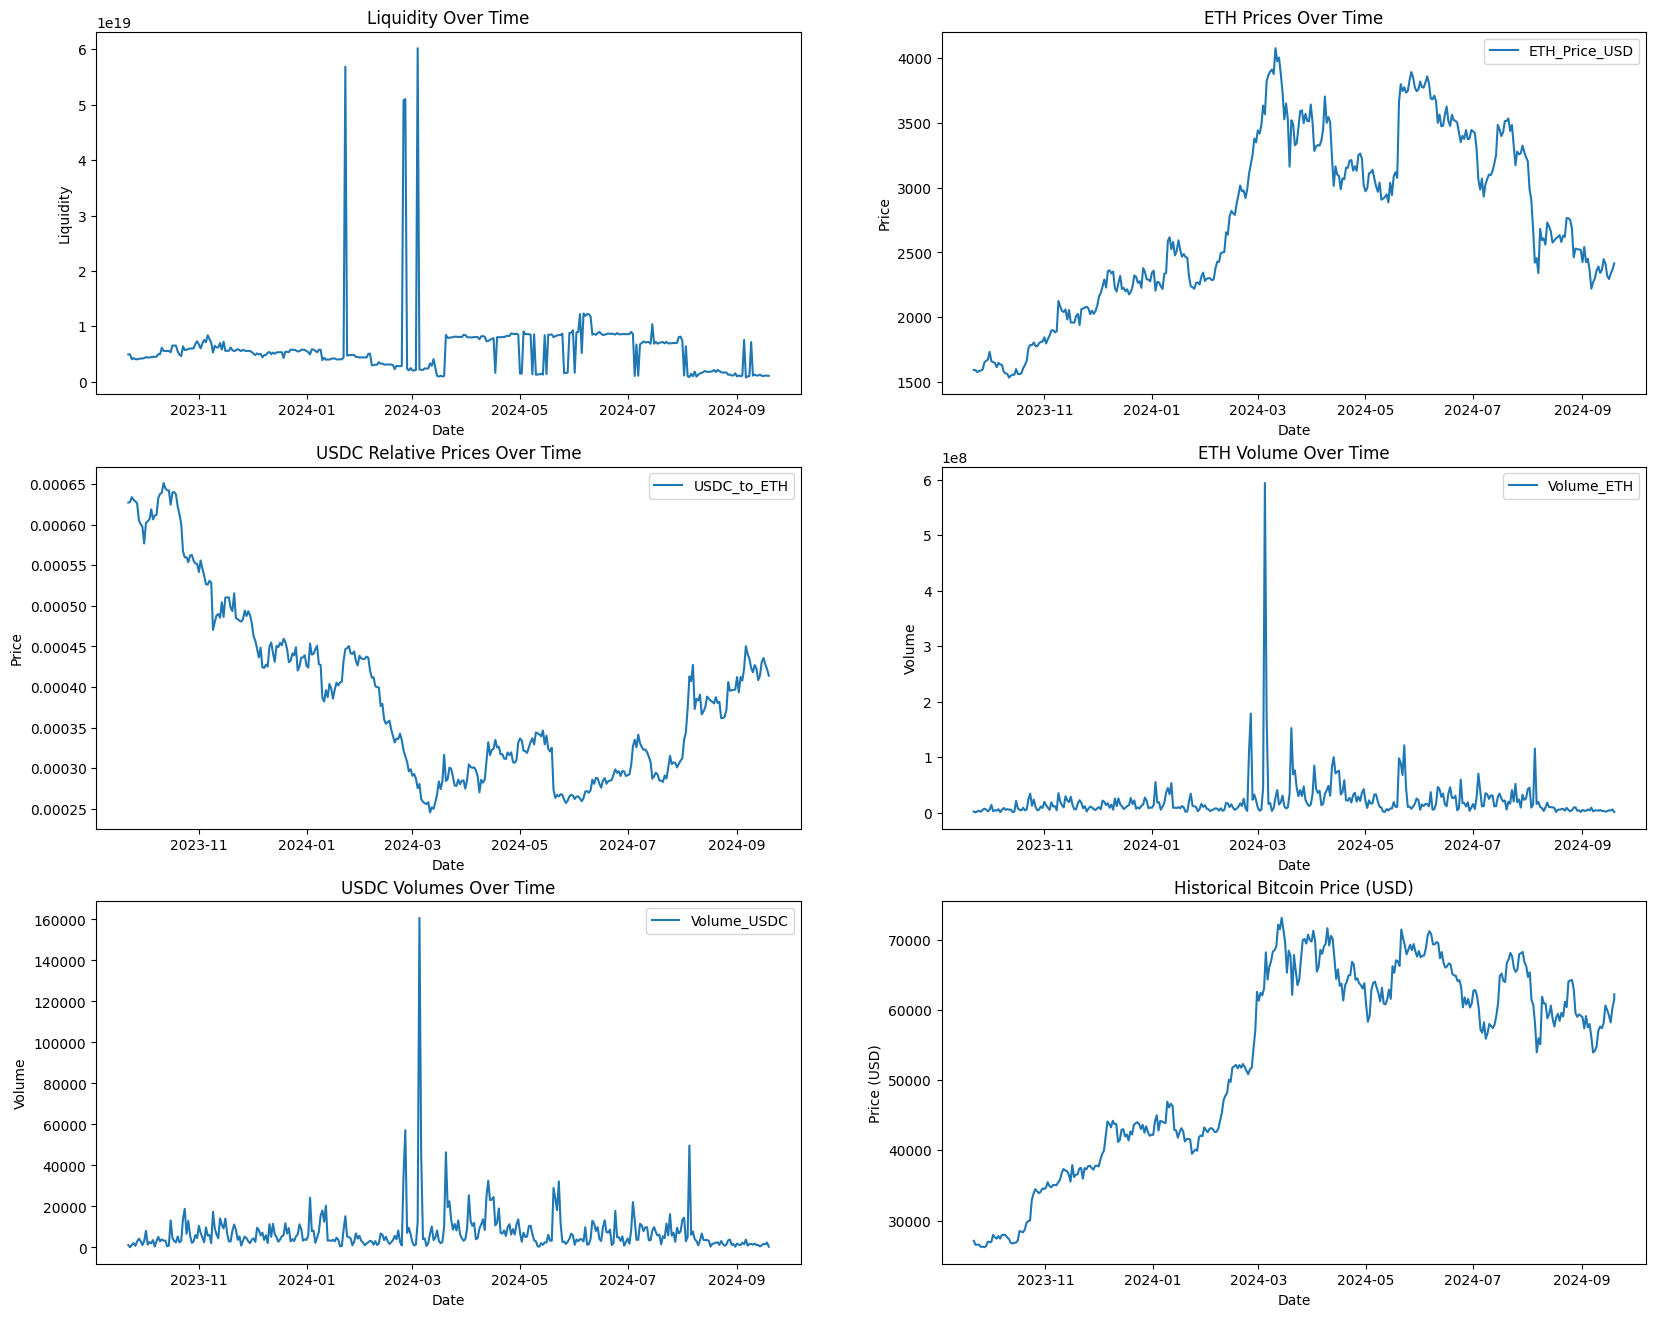

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(20, 16))

plt.subplot(3, 2, 1)
plt.plot(df['Date'], df['Liquidity'])
plt.title('Liquidity Over Time')
plt.xlabel('Date')
plt.ylabel('Liquidity')

plt.subplot(3, 2, 2)
plt.plot(df['Date'], df['ETH_Price_USD'], label='ETH_Price_USD')
plt.title('ETH Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(df['Date'], df['USDC_to_ETH'], label='USDC_to_ETH')
plt.title('USDC Relative Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(df['Date'], df['Volume_ETH'], label='Volume_ETH')
plt.title('ETH Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(df['Date'], df['Volume_USDC'], label='Volume_USDC')
plt.title('USDC Volumes Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(dates, prices_btc)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Historical Bitcoin Price (USD)')
plt.show()

plt.tight_layout()
plt.show()

In [14]:
#calculating the daily change in btc price and the percentage change in btc price

btc_changes = []
btc_changes_perc = []
for i in range(len(prices_btc)):
    if i == 0:
        btc_changes_perc.append(0)
    else:
        change = prices_btc[i] - prices_btc[i-1]
        ratio = change * 100 / prices_btc[i-1]
        btc_changes_perc.append(ratio)

for i in range(len(prices_btc)):
    if i == 0:
        btc_changes.append(0)
    else:
        change = prices_btc[i] - prices_btc[i-1]
        btc_changes.append(change)

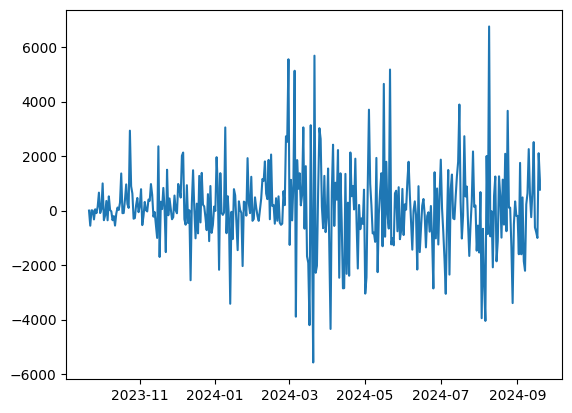

In [16]:
plt.plot(dates, btc_changes)

In [17]:
#calculating the fee generated in the LP

df['Trading_Volume'] = df['Volume_ETH'] * df['ETH_Price_USD'] + df['Volume_USDC'] * df['USDC_to_ETH']
df['Fees Earned Daily'] = df['Trading_Volume'] * 0.003

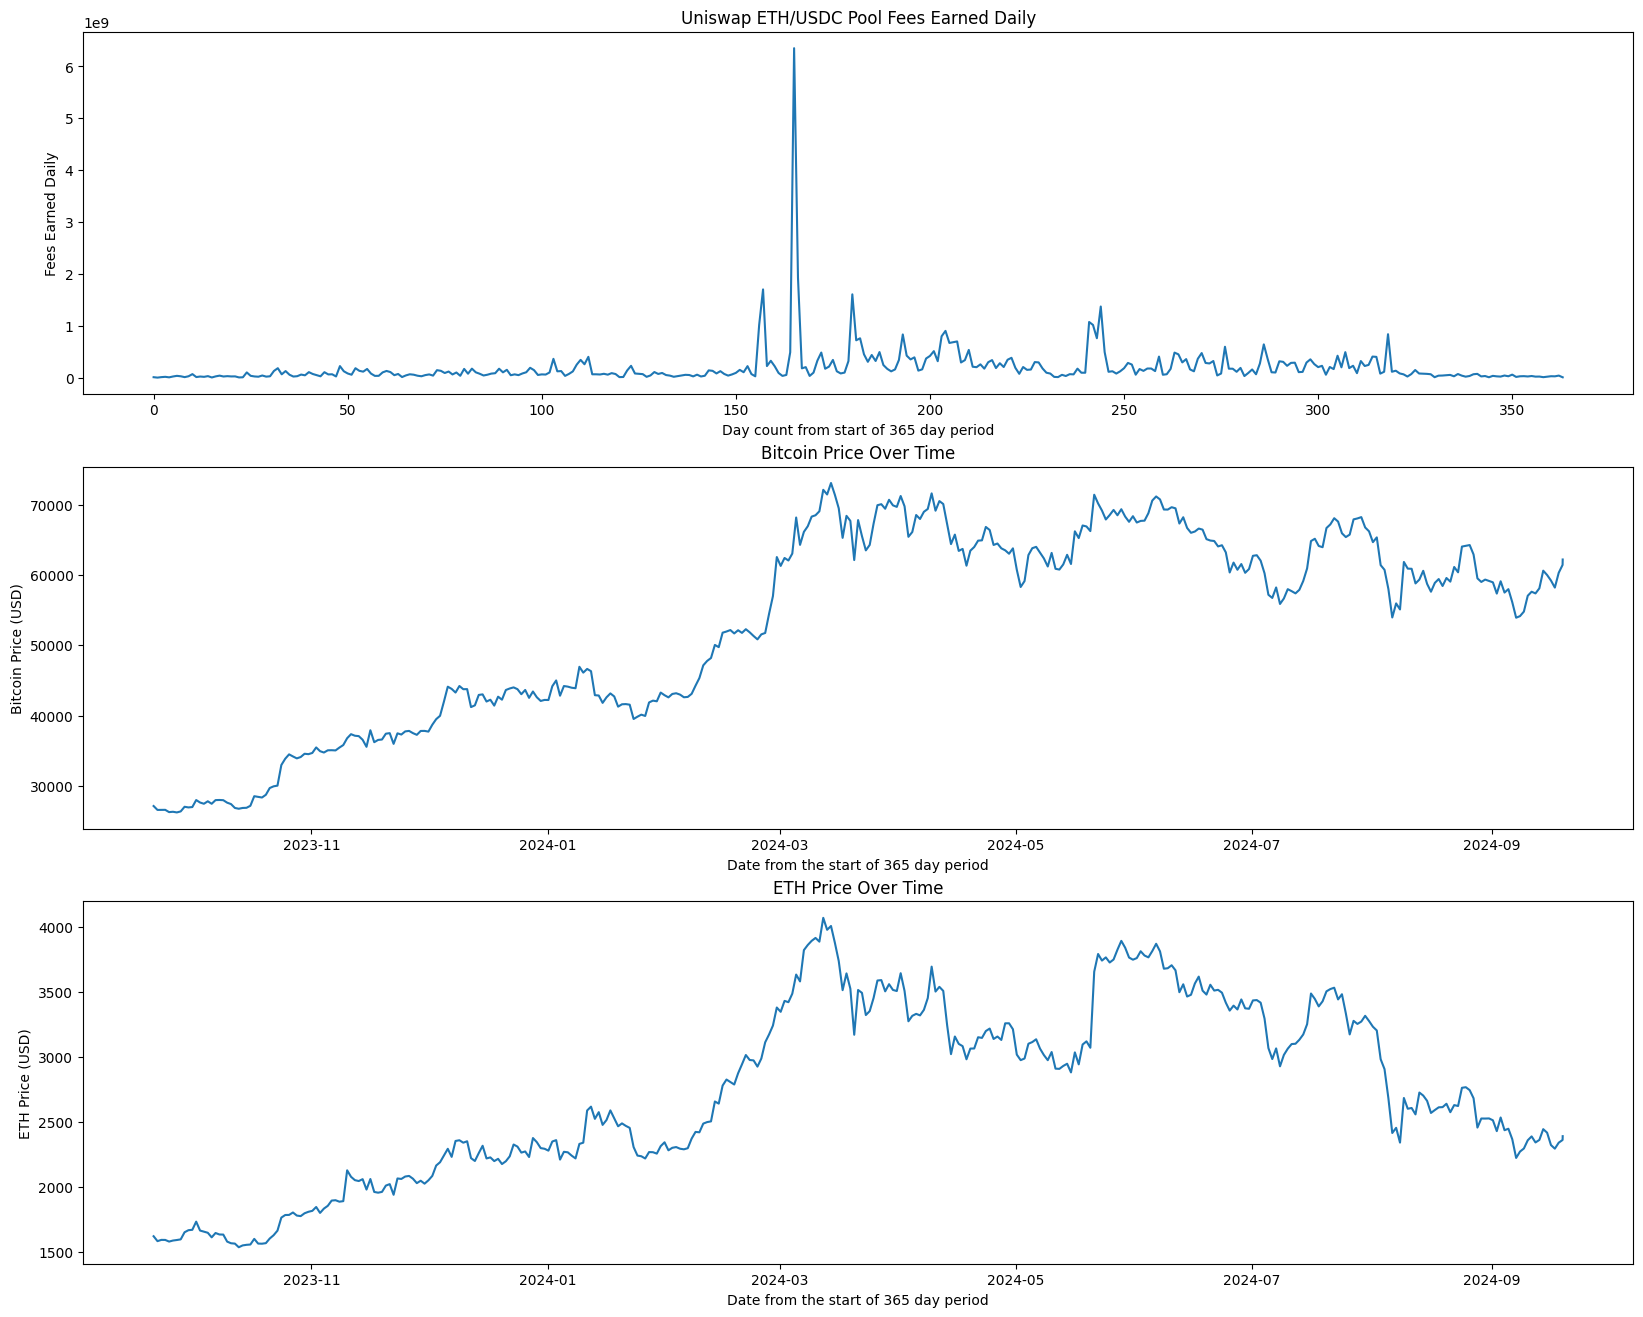

In [47]:
plt.figure(figsize=(20, 16))
plt.subplot(3, 1, 1)
plt.xlabel("Day count from start of 365 day period")
plt.ylabel("Fees Earned Daily")
plt.plot(df["Fees Earned Daily"])
plt.title("Uniswap ETH/USDC Pool Fees Earned Daily")

plt.subplot(3, 1, 2)
plt.xlabel("Date from the start of 365 day period")
plt.ylabel("Bitcoin Price (USD)")
plt.title("Bitcoin Price Over Time")
plt.plot(dates, prices_btc)

plt.subplot(3, 1, 3)
plt.xlabel("Date from the start of 365 day period")
plt.ylabel("ETH Price (USD)")
plt.title("ETH Price Over Time")
plt.plot(dates, prices_eth)

In [18]:
#calculating the daily change in fee generated and the percentage change in fee generated

fee_changes = []
fee_changes_perc = []

for i in range(len(df['Fees Earned Daily'])):
    if i == 0:
        fee_changes_perc.append(0)
    else:
        change = df['Fees Earned Daily'][i] - df['Fees Earned Daily'][i-1]
        ratio = (change/df['Fees Earned Daily'][i-1]) * 100
        fee_changes_perc.append(ratio)

for i in range(len(df['Fees Earned Daily'])):
    if i == 0:
        fee_changes.append(0)
    else:
        change = df['Fees Earned Daily'][i] - df['Fees Earned Daily'][i-1]
        fee_changes.append(change)

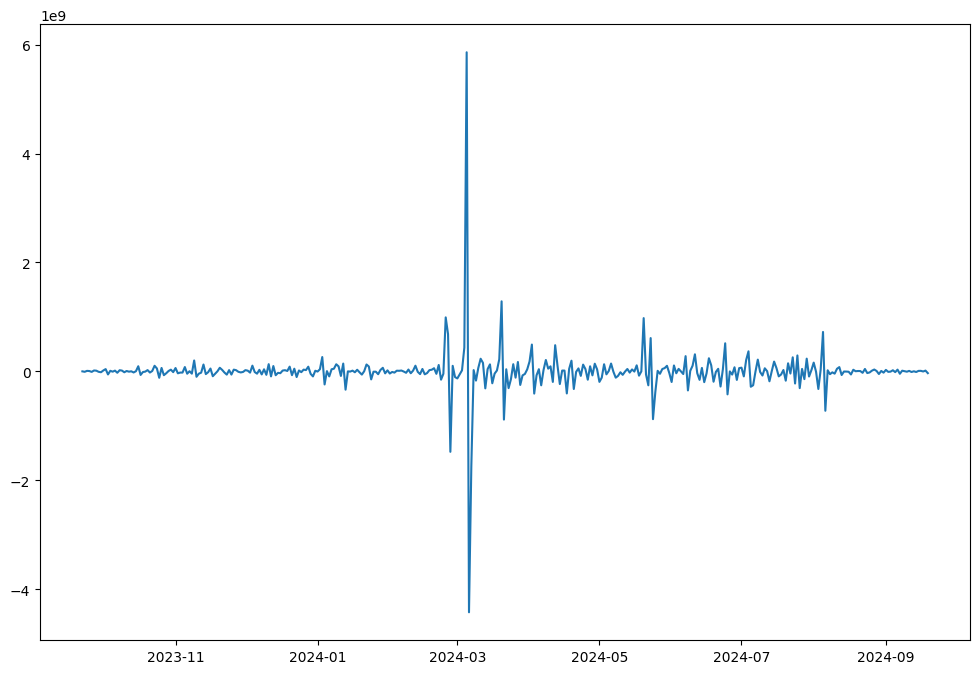

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(df['Date'], fee_changes, label='Fees')

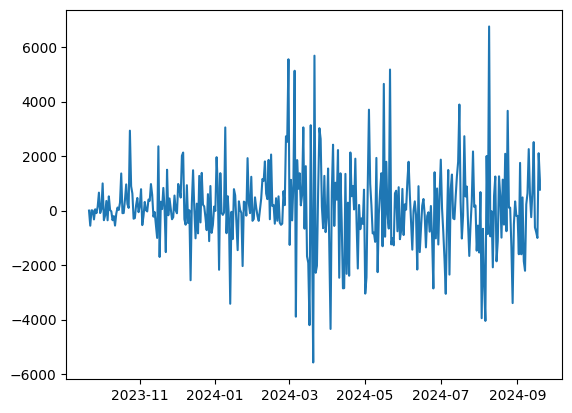

In [20]:
plt.plot(dates, btc_changes, label='BTC Changes')

In [48]:
btc_changes = np.array(btc_changes)
fee_changes = np.array(fee_changes)
btc_changes_scaled = (btc_changes - np.mean(btc_changes))/(np.std(btc_changes))
fee_changes_scaled = (fee_changes - np.mean(fee_changes))/(np.std(fee_changes))

len(btc_changes_scaled), len(fee_changes_scaled)


(366, 364)

In [23]:
print (dates[0])
print (df["Date"][0])
print (dates[-1])

2023-09-21 05:30:00
2023-09-22 00:00:00
2024-09-19 06:12:10


In [24]:
trunc_btc_changes = btc_changes[2:]
trunc_btc_changes_scaled = btc_changes_scaled[2:]

In [25]:
print (len(trunc_btc_changes), len(fee_changes))
btc_to_fee_changes = np.gradient(trunc_btc_changes, fee_changes)

364 364


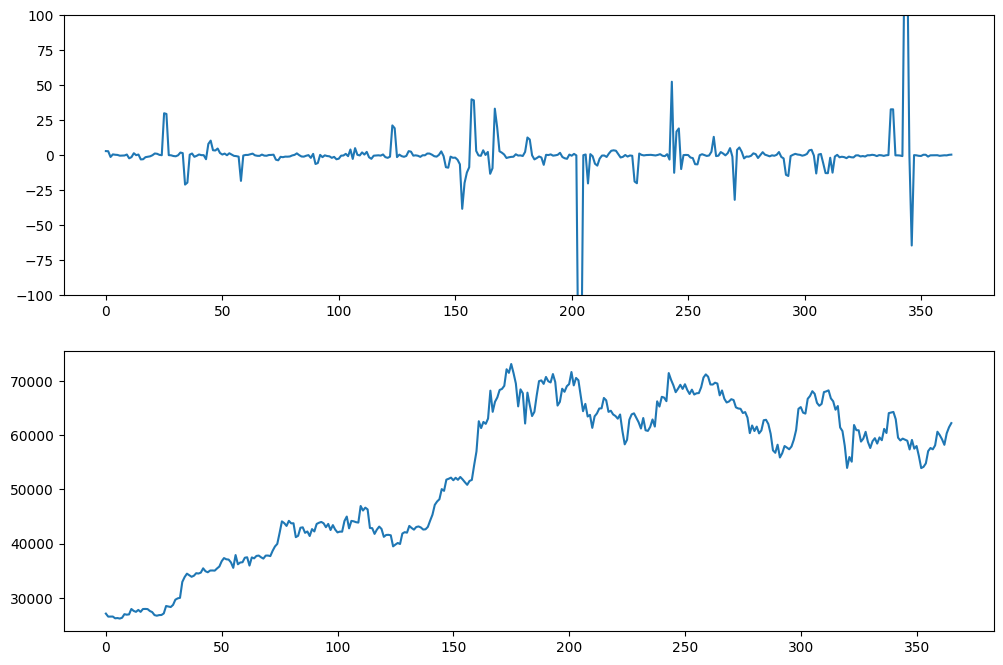

In [27]:
btc_to_fee_changes_scaled = np.gradient(fee_changes_scaled, trunc_btc_changes_scaled)
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(btc_to_fee_changes_scaled)
plt.ylim(-100, 100)

plt.subplot(2, 1, 2)
plt.plot(prices_btc)
plt.show()

In [28]:
#calculate the correlation between the two arrays
np.corrcoef(trunc_btc_changes_scaled, fee_changes_scaled)

array([[ 1.        , -0.13543911],
       [-0.13543911,  1.        ]])

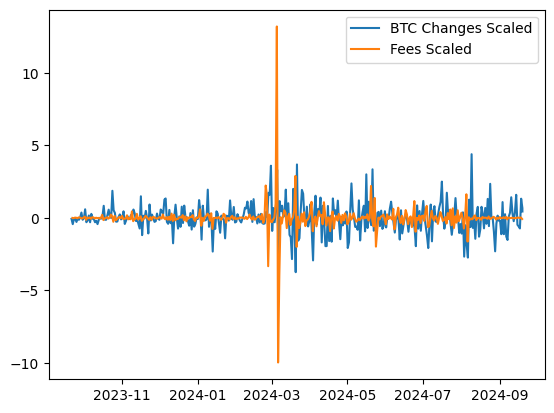

In [49]:
plt.plot(dates, btc_changes_scaled, label='BTC Changes Scaled')
plt.plot(df['Date'], fee_changes_scaled, label='Fees Scaled')
plt.legend()